# `Series`

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referrd to as the index.

### *Introduction*

In [2]:
import pandas as pd

In [2]:
numbers = [1, 2, 3, 4, 5] 

pd.Series(numbers)

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
numbers = [1, 2, 3, 4, 5] 
letters = ["a", "b", "c", "d", "e"]

pd.Series(data=letters, index=numbers)

1    a
2    b
3    c
4    d
5    e
dtype: object

In [4]:
letters = ["a", "b", "c", "d", "e"]

pd.Series(data=letters, 
          index=['letter1', 'letter2', 'letter3', 'letter4', 'letter5'])

letter1    a
letter2    b
letter3    c
letter4    d
letter5    e
dtype: object

In [5]:
data = {"name":"Luigi", "age":26, "work":"Unemployed"}

pd.Series(data)

name         Luigi
age             26
work    Unemployed
dtype: object

In [6]:
data = {"name":"Luigi", "age":26, "work":"Unemployed"}

pd.Series(data=data, index=["name", "age", "job"]) # job = NaN

name    Luigi
age        26
job       NaN
dtype: object

### *Attributes*

In [7]:
numbers = [1, 2, 3, 4, 5]
number_series = pd.Series(numbers) 

letters = ["a", "b", "c", "d", "e"]
letter_series = pd.Series(letters)

**.dtype** returns the type of Series

In [8]:
number_series.dtype

dtype('int64')

In [9]:
letter_series.dtype

dtype('O')

**.values** returns the Series as an array

In [10]:
number_series.values

array([1, 2, 3, 4, 5])

In [11]:
letter_series.values

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

**.index** returns information about the index

In [12]:
number_series.index

RangeIndex(start=0, stop=5, step=1)

In [13]:
letter_series.index

RangeIndex(start=0, stop=5, step=1)

In [14]:
pd.Series(index=letters, data=numbers).index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

**.hasnans** will check whether a series has missing values (or NaNs)

In [15]:
incomplete_series = pd.Series(['a', 'b', None])
# None => NaN
incomplete_series.hasnans

True

**.shape** returns the shape of a series as a tuple (5 lines and 1 column)
- Usually used with Dataframes

In [16]:
number_series.shape

(5,)

**.size** returns the size of the series

In [17]:
number_series.size

5

### *Methods*

In [18]:
values = pd.Series([1.5, 2.5, 0.5, None, 4.0, 1.0])
values

0    1.5
1    2.5
2    0.5
3    NaN
4    4.0
5    1.0
dtype: float64

Get the max and min of the values

In [19]:
values.max()

np.float64(4.0)

In [20]:
values.min()

np.float64(0.5)

Get sun of all the values

In [21]:
# 1.5 + 2.5 + 0.5 + 4.0 + 1.0 = 9.5
values.sum() 

np.float64(9.5)

Get the average of all the values

In [22]:
# values.sum() / (values.size -1) { -1 => NaN }
values.mean()

np.float64(1.9)

Get the index of the max & the min values of the series

In [23]:
# values[4]
values[values.idxmax()] 

np.float64(4.0)

In [24]:
# values[2]
values[values.idxmin()]

np.float64(0.5)

Return a series that checks whether each values is null or not

In [25]:
values.isnull()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

Round each value in the series

In [26]:
# 0   1.5 =round=> 2.0 
# 1   2.5 =round=> 2.0 
# 2   0.5 =round=> 0.0 
# 3   NaN
# 4   4.0 =round=> 4.0
# 5   1.0 =round=> 1.0

values.round() 

0    2.0
1    2.0
2    0.0
3    NaN
4    4.0
5    1.0
dtype: float64

In [27]:
# 4   4.12345678 =round(2)=> 4.12
values[4] = 4.12345678
values.round(2) 

0    1.50
1    2.50
2    0.50
3     NaN
4    4.12
5    1.00
dtype: float64

### *Handing CSV files*

Dataset: https://www.kaggle.com/datasets/tarundalal/100-richest-people-in-world

Read the csv file and squeeze the column into a series

In [3]:
richest = pd.read_csv("TopRichestInWorld.csv", usecols=['Name']).squeeze()
richest

0                     Elon Musk
1                    Jeff Bezos
2      Bernard Arnault & family
3                    Bill Gates
4                Warren Buffett
                 ...           
96             Vladimir Potanin
97         Harold Hamm & family
98                 Sun Piaoyang
99           Luo Liguo & family
100                   Peter Woo
Name: Name, Length: 101, dtype: object

Check the type of richest

In [29]:
type(richest)

pandas.core.series.Series

Create a csv file (this will be placed in the current folder)

In [30]:
richest.to_csv("test.csv", index=False) # set to False to avoid extra index

Read the csv file that we created

In [31]:
pd.read_csv("test.csv")

,Name
0,Elon Musk
1,Jeff Bezos
2,Bernard Arnault & family
3,Bill Gates
4,Warren Buffett
...,...
96,Vladimir Potanin
97,Harold Hamm & family
98,Sun Piaoyang
99,Luo Liguo & family


### *head & tail*

In [32]:
richest

0                     Elon Musk
1                    Jeff Bezos
2      Bernard Arnault & family
3                    Bill Gates
4                Warren Buffett
                 ...           
96             Vladimir Potanin
97         Harold Hamm & family
98                 Sun Piaoyang
99           Luo Liguo & family
100                   Peter Woo
Name: Name, Length: 101, dtype: object

In [33]:
richest.head(10) # Will return the first 10 rows

0                   Elon Musk
1                  Jeff Bezos
2    Bernard Arnault & family
3                  Bill Gates
4              Warren Buffett
5                  Larry Page
6                 Sergey Brin
7               Larry Ellison
8               Steve Ballmer
9               Mukesh Ambani
Name: Name, dtype: object

In [34]:
# -10 => 91 { richest.head(91) }
richest.head(-10) # Will return all rows from the start (excluding the last 10)

0                    Elon Musk
1                   Jeff Bezos
2     Bernard Arnault & family
3                   Bill Gates
4               Warren Buffett
                ...           
86              Vladimir Lisin
87        Fan Hongwei & family
88              Lakshmi Mittal
89              Andrew Forrest
90     Jiang Rensheng & family
Name: Name, Length: 91, dtype: object

In [35]:
richest.tail(10) # Will return the last 10 rows

91     Savitri Jindal & family
92                 Wang Wenyin
93                   Li Xiting
94              Stefan Persson
95                 Steve Cohen
96            Vladimir Potanin
97        Harold Hamm & family
98                Sun Piaoyang
99          Luo Liguo & family
100                  Peter Woo
Name: Name, dtype: object

In [36]:
# -10 => 91 { richest.tail(91) }
richest.tail(-10) # Will return all rows starting from the end (excluding the first 10)

10                     Gautam Adani & family
11                         Michael Bloomberg
12                 Carlos Slim Helu & family
13     Francoise Bettencourt Meyers & family
14                           Mark Zuckerberg
                       ...                  
96                          Vladimir Potanin
97                      Harold Hamm & family
98                              Sun Piaoyang
99                        Luo Liguo & family
100                                Peter Woo
Name: Name, Length: 91, dtype: object

### *Sorting values in a Series*

In [37]:
richest

0                     Elon Musk
1                    Jeff Bezos
2      Bernard Arnault & family
3                    Bill Gates
4                Warren Buffett
                 ...           
96             Vladimir Potanin
97         Harold Hamm & family
98                 Sun Piaoyang
99           Luo Liguo & family
100                   Peter Woo
Name: Name, Length: 101, dtype: object

In [38]:
richest.sort_values()

74         Abigail Johnson
42        Alain Wertheimer
17            Alice Walton
22          Amancio Ortega
89          Andrew Forrest
              ...         
4           Warren Buffett
54        William Lei Ding
85    Yang Huiyan & family
24            Zhang Yiming
16          Zhong Shanshan
Name: Name, Length: 101, dtype: object

In [39]:
richest.sort_values(axis=0,
                    ascending=False, # ascending = False
                    kind="quicksort",
                    na_position="last")  

16          Zhong Shanshan
24            Zhang Yiming
85    Yang Huiyan & family
54        William Lei Ding
4           Warren Buffett
              ...         
89          Andrew Forrest
22          Amancio Ortega
17            Alice Walton
42        Alain Wertheimer
74         Abigail Johnson
Name: Name, Length: 101, dtype: object

In [40]:
richest.sort_values(axis=0,
                    ascending=False,
                    ignore_index=True) # ignore_index = True

0            Zhong Shanshan
1              Zhang Yiming
2      Yang Huiyan & family
3          William Lei Ding
4            Warren Buffett
               ...         
96           Andrew Forrest
97           Amancio Ortega
98             Alice Walton
99         Alain Wertheimer
100         Abigail Johnson
Name: Name, Length: 101, dtype: object

In [5]:
richest.sort_values(ascending=False,
                    ignore_index=True) 


0            Zhong Shanshan
1              Zhang Yiming
2      Yang Huiyan & family
3          William Lei Ding
4            Warren Buffett
               ...         
96           Andrew Forrest
97           Amancio Ortega
98             Alice Walton
99         Alain Wertheimer
100         Abigail Johnson
Name: Name, Length: 101, dtype: object

### *Counting values in a Series*

In [ ]:
pd.read_csv("TopRichestInWorld.csv")


,Name,NetWorth,Age,Country/Territory,Source,Industry
0,Elon Musk,"$219,000,000,000",50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,"$171,000,000,000",58,United States,Amazon,Technology
2,Bernard Arnault & family,"$158,000,000,000",73,France,LVMH,Fashion & Retail
3,Bill Gates,"$129,000,000,000",66,United States,Microsoft,Technology
4,Warren Buffett,"$118,000,000,000",91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...
96,Vladimir Potanin,"$17,300,000,000",61,Russia,metals,Metals & Mining
97,Harold Hamm & family,"$17,200,000,000",76,United States,oil & gas,Energy
98,Sun Piaoyang,"$17,100,000,000",63,China,pharmaceuticals,Healthcare
99,Luo Liguo & family,"$17,000,000,000",66,China,chemicals,Manufacturing


In [ ]:
richest = pd.read_csv("TopRichestInWorld.csv", usecols=['Industry']).squeeze()
richest

0                 Automotive
1                 Technology
2           Fashion & Retail
3                 Technology
4      Finance & Investments
               ...          
96           Metals & Mining
97                    Energy
98                Healthcare
99             Manufacturing
100              Real Estate
Name: Industry, Length: 101, dtype: object

In [ ]:
richest.value_counts()

Industry
Fashion & Retail         18
Technology               15
Finance & Investments    13
Metals & Mining           9
Food & Beverage           8
Automotive                7
Diversified               6
Manufacturing             5
Healthcare                5
Media & Entertainment     4
Real Estate               3
Telecom                   2
Logistics                 2
Energy                    2
Gambling & Casinos        1
Service                   1
Name: count, dtype: int64

In [ ]:
richest.value_counts(normalize=True)

Industry
Fashion & Retail         0.178218
Technology               0.148515
Finance & Investments    0.128713
Metals & Mining          0.089109
Food & Beverage          0.079208
Automotive               0.069307
Diversified              0.059406
Manufacturing            0.049505
Healthcare               0.049505
Media & Entertainment    0.039604
Real Estate              0.029703
Telecom                  0.019802
Logistics                0.019802
Energy                   0.019802
Gambling & Casinos       0.009901
Service                  0.009901
Name: proportion, dtype: float64

In [ ]:
# 0.178218 + 0.148515 + ... + 0.009901 + 0.009901 = 1.0
richest.value_counts(normalize=True).sum()

np.float64(1.0)

In [ ]:
richest.value_counts(sort=False)

Industry
Automotive                7
Technology               15
Fashion & Retail         18
Finance & Investments    13
Diversified               6
Media & Entertainment     4
Telecom                   2
Food & Beverage           8
Logistics                 2
Real Estate               3
Metals & Mining           9
Manufacturing             5
Gambling & Casinos        1
Healthcare                5
Service                   1
Energy                    2
Name: count, dtype: int64

In [ ]:
richest.value_counts(ascending=True)

Industry
Gambling & Casinos        1
Service                   1
Telecom                   2
Logistics                 2
Energy                    2
Real Estate               3
Media & Entertainment     4
Manufacturing             5
Healthcare                5
Diversified               6
Automotive                7
Food & Beverage           8
Metals & Mining           9
Finance & Investments    13
Technology               15
Fashion & Retail         18
Name: count, dtype: int64

In [ ]:
richest = pd.read_csv("TopRichestInWorld.csv", usecols=['Age']).squeeze()
richest

0      50
1      58
2      73
3      66
4      91
       ..
96     61
97     76
98     63
99     66
100    75
Name: Age, Length: 101, dtype: int64

In [ ]:
# from age:{29} to age:{51} => 15
# from age:{51} to age:{72} => 47
# from age:{72} to age:{94} => 39
richest.value_counts(bins=3)

(51.333, 72.667]    47
(72.667, 94.0]      39
(29.935, 51.333]    15
Name: count, dtype: int64

In [ ]:
richest.value_counts(bins=5, sort=False)

(29.935, 42.8]     5
(42.8, 55.6]      17
(55.6, 68.4]      33
(68.4, 81.2]      27
(81.2, 94.0]      19
Name: count, dtype: int64

### *Accessing elements via position*

In [ ]:
richest = pd.read_csv("TopRichestInWorld.csv", usecols=['Name']).squeeze()
richest

0                     Elon Musk
1                    Jeff Bezos
2      Bernard Arnault & family
3                    Bill Gates
4                Warren Buffett
                 ...           
96             Vladimir Potanin
97         Harold Hamm & family
98                 Sun Piaoyang
99           Luo Liguo & family
100                   Peter Woo
Name: Name, Length: 101, dtype: object

In [ ]:
richest.index

RangeIndex(start=0, stop=101, step=1)

Accessing an element via its exact position

In [ ]:
richest[0]

'Elon Musk'

Accessing multiple elements with a list of positions

In [ ]:
richest[[1, 5, 15]]

1     Jeff Bezos
5     Larry Page
15    Jim Walton
Name: Name, dtype: object

Accessing via slicing

In [ ]:
richest[5:10]

5       Larry Page
6      Sergey Brin
7    Larry Ellison
8    Steve Ballmer
9    Mukesh Ambani
Name: Name, dtype: object

Accessing via slicing with a step

In [ ]:
richest[0:21:5]

0                 Elon Musk
5                Larry Page
10    Gautam Adani & family
15               Jim Walton
20             Charles Koch
Name: Name, dtype: object

Accessing everything until 10 (excluded)

In [ ]:
richest[:10]

0                   Elon Musk
1                  Jeff Bezos
2    Bernard Arnault & family
3                  Bill Gates
4              Warren Buffett
5                  Larry Page
6                 Sergey Brin
7               Larry Ellison
8               Steve Ballmer
9               Mukesh Ambani
Name: Name, dtype: object

In [ ]:
richest[-1:]

100    Peter Woo
Name: Name, dtype: object

In [ ]:
richest[-5:]

96         Vladimir Potanin
97     Harold Hamm & family
98             Sun Piaoyang
99       Luo Liguo & family
100               Peter Woo
Name: Name, dtype: object

In [ ]:
richest[-5:-4]

96    Vladimir Potanin
Name: Name, dtype: object

### *Accessing elements via index*

In [ ]:
richest = pd.read_csv("TopRichestInWorld.csv", 
                      usecols=['Name', 'NetWorth'],
                      index_col='Name').squeeze()
richest

Name
Elon Musk                   $219,000,000,000
Jeff Bezos                  $171,000,000,000
Bernard Arnault & family    $158,000,000,000
Bill Gates                  $129,000,000,000
Warren Buffett              $118,000,000,000
                                  ...       
Vladimir Potanin             $17,300,000,000
Harold Hamm & family         $17,200,000,000
Sun Piaoyang                 $17,100,000,000
Luo Liguo & family           $17,000,000,000
Peter Woo                    $17,000,000,000
Name: NetWorth, Length: 101, dtype: object

Displaying the first 10 elements

In [ ]:
richest.head(10)

Name
Elon Musk                   $219,000,000,000
Jeff Bezos                  $171,000,000,000
Bernard Arnault & family    $158,000,000,000
Bill Gates                  $129,000,000,000
Warren Buffett              $118,000,000,000
Larry Page                  $111,000,000,000
Sergey Brin                 $107,000,000,000
Larry Ellison               $106,000,000,000
Steve Ballmer                $91,400,000,000
Mukesh Ambani                $90,700,000,000
Name: NetWorth, dtype: object

In [ ]:
richest.index

Index(['Elon Musk', 'Jeff Bezos', 'Bernard Arnault & family', 'Bill Gates',
       'Warren Buffett', 'Larry Page', 'Sergey Brin', 'Larry Ellison',
       'Steve Ballmer', 'Mukesh Ambani',
       ...
       'Savitri Jindal & family', 'Wang Wenyin', 'Li Xiting', 'Stefan Persson',
       'Steve Cohen', 'Vladimir Potanin', 'Harold Hamm & family',
       'Sun Piaoyang', 'Luo Liguo & family', 'Peter Woo'],
      dtype='object', name='Name', length=101)

Accessing a single element

In [ ]:
richest['Bill Gates'] 

'$129,000,000,000'

Accessing multiple elements

In [ ]:
richest[['Bill Gates', 'Warren Buffett']] 

Name
Bill Gates        $129,000,000,000
Warren Buffett    $118,000,000,000
Name: NetWorth, dtype: object

Slicing via index

In [ ]:
richest['Bill Gates':'Steve Ballmer'] 

Name
Bill Gates        $129,000,000,000
Warren Buffett    $118,000,000,000
Larry Page        $111,000,000,000
Sergey Brin       $107,000,000,000
Larry Ellison     $106,000,000,000
Steve Ballmer      $91,400,000,000
Name: NetWorth, dtype: object

You can still access elements through their position

In [ ]:
richest[0:2]

Name
Elon Musk     $219,000,000,000
Jeff Bezos    $171,000,000,000
Name: NetWorth, dtype: object

# `DataFrame`

**What are dataframe?**
- DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

- Essentially is just comprised of 2 or more series.

- axis = 0 refers to the index
- axis = 1 refers to the columns

In [ ]:
data = {'a':[100, 200, 300], 
        'b':[400, 500, 600], 
        'c':[700, 800, 900]}
 
df = pd.DataFrame(data)
df

,a,b,c
0,100,400,700
1,200,500,800
2,300,600,900


Returns to us a series

In [7]:
df['a']

0    100
1    200
2    300
Name: a, dtype: int64

In [8]:
df = pd.DataFrame(data=[[100, 200, 300], [400, 500, 600], [700, 800, 900]],
                  index=['first', 'second', 'third'],
                  columns=['a', 'b', 'c'])
df

,a,b,c
first,100,200,300
second,400,500,600
third,700,800,900


Can also be referred to via dot notation, although this can create some trouble

In [9]:
df.a

first     100
second    400
third     700
Name: a, dtype: int64

### *Attributes*

In [10]:
richest = pd.read_csv('TopRichestInWorld.csv')
richest

,Name,NetWorth,Age,Country/Territory,Source,Industry
0,Elon Musk,"$219,000,000,000",50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,"$171,000,000,000",58,United States,Amazon,Technology
2,Bernard Arnault & family,"$158,000,000,000",73,France,LVMH,Fashion & Retail
3,Bill Gates,"$129,000,000,000",66,United States,Microsoft,Technology
4,Warren Buffett,"$118,000,000,000",91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...
96,Vladimir Potanin,"$17,300,000,000",61,Russia,metals,Metals & Mining
97,Harold Hamm & family,"$17,200,000,000",76,United States,oil & gas,Energy
98,Sun Piaoyang,"$17,100,000,000",63,China,pharmaceuticals,Healthcare
99,Luo Liguo & family,"$17,000,000,000",66,China,chemicals,Manufacturing


In [12]:
richest.shape

(101, 6)

In [ ]:
# 101 * 6 = 606
richest.size

606

In [14]:
richest.index

RangeIndex(start=0, stop=101, step=1)

In [15]:
richest.columns

Index(['Name', 'NetWorth', 'Age', 'Country/Territory', 'Source', 'Industry'], dtype='object')

In [16]:
richest.axes

[RangeIndex(start=0, stop=101, step=1),
 Index(['Name', 'NetWorth', 'Age', 'Country/Territory', 'Source', 'Industry'], dtype='object')]

In [17]:
richest.dtypes

Name                 object
NetWorth             object
Age                   int64
Country/Territory    object
Source               object
Industry             object
dtype: object

In [20]:
richest.values[:5]

array([['Elon Musk', '$219,000,000,000', 50, 'United States',
        'Tesla, SpaceX', 'Automotive'],
       ['Jeff Bezos', '$171,000,000,000', 58, 'United States', 'Amazon',
        'Technology'],
       ['Bernard Arnault & family', '$158,000,000,000', 73, 'France',
        'LVMH', 'Fashion & Retail'],
       ['Bill Gates', '$129,000,000,000', 66, 'United States',
        'Microsoft', 'Technology'],
       ['Warren Buffett', '$118,000,000,000', 91, 'United States',
        'Berkshire Hathaway', 'Finance & Investments']], dtype=object)

### *Methods*

Here we create a series

In [3]:
series = pd.Series([100, 200, 300])
series

0    100
1    200
2    300
dtype: int64

Sums each value and returns a result

In [5]:
series.sum()

np.int64(600)

Here we create a DataFrame

In [4]:
data = {'a':[100, 200, 300], 
        'b':[400, 500, 600], 
        'c':[700, 800, 900]}

df = pd.DataFrame(data)
df

,a,b,c
0,100,400,700
1,200,500,800
2,300,600,900


Sums each value per colum and returns a Series

In [ ]:
df.sum() # axis=0

a     600
b    1500
c    2400
dtype: int64

Will sum things up horizontally (columns)

In [ ]:
df.sum(axis=1) # axis='columns'

0    1200
1    1500
2    1800
dtype: int64

In [15]:
df.sum(axis='index') # Same as axis=0

a     600
b    1500
c    2400
dtype: int64

Choose whichever makes it easier for you to remember

In [13]:
df.max()

a    300
b    600
c    900
dtype: int64

In [16]:
df.max(axis='columns') # axis=1

0    700
1    800
2    900
dtype: int64

### *describe & info*

Dataset: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-1000-movies-and-tv-shows

Specify the columns we want

In [4]:
cols = ['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Gross', 'Released_Year', 'Genre']

Read the dataset

In [5]:
movies = pd.read_csv('imdb_top_1000.csv', usecols=cols)
movies

,Series_Title,Released_Year,Genre,IMDB_Rating,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,9.3,2343110,"28,341,469"
1,The Godfather,1972,"Crime, Drama",9.2,1620367,"134,966,411"
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,2303232,"534,858,444"
3,The Godfather: Part II,1974,"Crime, Drama",9.0,1129952,"57,300,000"
4,12 Angry Men,1957,"Crime, Drama",9.0,689845,"4,360,000"
...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,"Comedy, Drama, Romance",7.6,166544,NaN
996,Giant,1956,"Drama, Western",7.6,34075,NaN
997,From Here to Eternity,1953,"Drama, Romance, War",7.6,43374,"30,500,000"
998,Lifeboat,1944,"Drama, War",7.6,26471,NaN


.info()
- Gives use a lot of information
- Gives us the types
- Tells us whether we're missing values
- Shows us the memory usage

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Genre          1000 non-null   object 
 3   IMDB_Rating    1000 non-null   float64
 4   No_of_Votes    1000 non-null   int64  
 5   Gross          831 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


But what happened to Gross?

In [7]:
movies.describe().round()

,IMDB_Rating,No_of_Votes
count,1000.0,1000.0
mean,8.0,273693.0
std,0.0,327373.0
min,8.0,25088.0
25%,8.0,55526.0
50%,8.0,138548.0
75%,8.0,374161.0
max,9.0,2343110.0


Convert data  into an integer so we can use it as numeric data

In [ ]:
movies['Gross'] = movies['Gross'].fillna(0)
movies['Gross'] = movies['Gross'].astype('int64')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Genre          1000 non-null   object 
 3   IMDB_Rating    1000 non-null   float64
 4   No_of_Votes    1000 non-null   int64  
 5   Gross          1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


percentiles = [.20, .40, .60, 80]

In [14]:
movies.describe().round()

,IMDB_Rating,No_of_Votes,Gross
count,1000.0,1000.0,1000.0
mean,8.0,273693.0,56536878.0
std,0.0,327373.0,103238179.0
min,8.0,25088.0,0.0
25%,8.0,55526.0,445710.0
50%,8.0,138548.0,10702752.0
75%,8.0,374161.0,61539891.0
max,9.0,2343110.0,936662225.0


In [15]:
movies.count()

Series_Title     1000
Released_Year    1000
Genre            1000
IMDB_Rating      1000
No_of_Votes      1000
Gross            1000
dtype: int64

In [17]:
movies.mean(numeric_only=True).round()

IMDB_Rating           8.0
No_of_Votes      273693.0
Gross          56536878.0
dtype: float64

In [18]:
movies.max(numeric_only=True).round()

IMDB_Rating            9.0
No_of_Votes      2343110.0
Gross          936662225.0
dtype: float64

In [19]:
movies.min(numeric_only=True).round()

IMDB_Rating        8.0
No_of_Votes    25088.0
Gross              0.0
dtype: float64

What enters in that quantile

In [25]:
movies.quantile(q=.25, numeric_only=True).round()

IMDB_Rating         8.0
No_of_Votes     55526.0
Gross          445710.0
Name: 0.25, dtype: float64

Includes every datatype if you specify 'all'

In [35]:
movies.describe(include=['O']) 
# Also provides 4 other fields

,Series_Title,Released_Year,Genre
count,1000,1000,1000
unique,999,100,202
top,Drishyam,2014,Drama
freq,2,32,85


In [36]:
movies.describe(include=['O', 'int']) 

,Series_Title,Released_Year,Genre,No_of_Votes,Gross
count,1000,1000,1000,1.000000e+03,1.000000e+03
unique,999,100,202,NaN,NaN
top,Drishyam,2014,Drama,NaN,NaN
freq,2,32,85,NaN,NaN
mean,NaN,NaN,NaN,2.736929e+05,5.653688e+07
std,NaN,NaN,NaN,3.273727e+05,1.032382e+08
min,NaN,NaN,NaN,2.508800e+04,0.000000e+00
25%,NaN,NaN,NaN,5.552625e+04,4.457098e+05
50%,NaN,NaN,NaN,1.385485e+05,1.070275e+07
75%,NaN,NaN,NaN,3.741612e+05,6.153989e+07


### *nlargest & nsmallest*

In [3]:
cols = ['Series_Title', 'IMDB_Rating', 'No_of_Votes']
movies = pd.read_csv('imdb_top_1000.csv', usecols=cols)
movies

,Series_Title,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,9.3,2343110
1,The Godfather,9.2,1620367
2,The Dark Knight,9.0,2303232
3,The Godfather: Part II,9.0,1129952
4,12 Angry Men,9.0,689845
...,...,...,...
995,Breakfast at Tiffany's,7.6,166544
996,Giant,7.6,34075
997,From Here to Eternity,7.6,43374
998,Lifeboat,7.6,26471


.nlargest()
- This method is equivalent to `df.sort_values(columns, ascending=False).head(n)`, but more performant.

In [8]:
movies.nlargest(n=10, columns='No_of_Votes')

,Series_Title,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,9.3,2343110
2,The Dark Knight,9.0,2303232
8,Inception,8.8,2067042
9,Fight Club,8.8,1854740
6,Pulp Fiction,8.9,1826188
11,Forrest Gump,8.8,1809221
14,The Matrix,8.7,1676426
10,The Lord of the Rings: The Fellowship of the Ring,8.8,1661481
5,The Lord of the Rings: The Return of the King,8.9,1642758
1,The Godfather,9.2,1620367


Gives priorty first to **IMDB_Rating**, and then to **No_of_Votes**

In [10]:
movies.nlargest(n=10, columns=['IMDB_Rating', 'No_of_Votes'])

,Series_Title,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,9.3,2343110
1,The Godfather,9.2,1620367
2,The Dark Knight,9.0,2303232
3,The Godfather: Part II,9.0,1129952
4,12 Angry Men,9.0,689845
6,Pulp Fiction,8.9,1826188
5,The Lord of the Rings: The Return of the King,8.9,1642758
7,Schindler's List,8.9,1213505
8,Inception,8.8,2067042
9,Fight Club,8.8,1854740


In [11]:
movies.nsmallest(n=10, columns='No_of_Votes')

,Series_Title,IMDB_Rating,No_of_Votes
264,Ba wang bie ji,8.1,25088
721,God's Own Country,7.7,25198
694,La planète sauvage,7.8,25229
718,Scarface: The Shame of the Nation,7.8,25312
570,Raazi,7.8,25344
785,The Magdalene Sisters,7.7,25938
989,The Long Goodbye,7.6,26337
169,Dom za vesanje,8.2,26402
814,Do lok tin si,7.7,26429
863,Cape Fear,7.7,26457


In [12]:
movies.nsmallest(n=10, columns=['IMDB_Rating', 'No_of_Votes'])

,Series_Title,IMDB_Rating,No_of_Votes
989,The Long Goodbye,7.6,26337
998,Lifeboat,7.6,26471
971,Omohide poro poro,7.6,27071
981,On Golden Pond,7.6,27650
880,Nelyubov,7.6,29765
990,Giù la testa,7.6,30144
920,The Secret of Kells,7.6,31779
984,The Muppet Movie,7.6,32802
986,Watership Down,7.6,33656
996,Giant,7.6,34075


- keep= *'first'* means it will keep the first duplicate (defult)
- keep= *'last'*  means it will keep the last duplicate 
- keep= *'all'*   means it will keep all duplicates

In [16]:
movies.nsmallest(n=10, columns='IMDB_Rating', keep='last')

,Series_Title,IMDB_Rating,No_of_Votes
999,The 39 Steps,7.6,51853
998,Lifeboat,7.6,26471
997,From Here to Eternity,7.6,43374
996,Giant,7.6,34075
995,Breakfast at Tiffany's,7.6,166544
994,A Hard Day's Night,7.6,40351
993,Blowup,7.6,56513
992,The Jungle Book,7.6,166409
991,Kelly's Heroes,7.6,45338
990,Giù la testa,7.6,30144


In [17]:
movies.nsmallest(n=10, columns='IMDB_Rating', keep='all')

,Series_Title,IMDB_Rating,No_of_Votes
877,Dark Waters,7.6,60408
878,Searching,7.6,140840
879,Once Upon a Time... in Hollywood,7.6,551309
880,Nelyubov,7.6,29765
881,The Florida Project,7.6,95181
...,...,...,...
995,Breakfast at Tiffany's,7.6,166544
996,Giant,7.6,34075
997,From Here to Eternity,7.6,43374
998,Lifeboat,7.6,26471


In [18]:
movies.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=False).head(10)

,Series_Title,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,9.3,2343110
1,The Godfather,9.2,1620367
2,The Dark Knight,9.0,2303232
3,The Godfather: Part II,9.0,1129952
4,12 Angry Men,9.0,689845
6,Pulp Fiction,8.9,1826188
5,The Lord of the Rings: The Return of the King,8.9,1642758
7,Schindler's List,8.9,1213505
8,Inception,8.8,2067042
9,Fight Club,8.8,1854740


### *set_index & reset_index*

In [11]:
cols = ['Series_Title', 'IMDB_Rating', 'No_of_Votes']
movies = pd.read_csv('imdb_top_1000.csv', usecols=cols)
movies.head(5)

,Series_Title,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,9.3,2343110
1,The Godfather,9.2,1620367
2,The Dark Knight,9.0,2303232
3,The Godfather: Part II,9.0,1129952
4,12 Angry Men,9.0,689845


set_index()
- **drop** removes the column which has now become the index (True by default)
- **inplace** defines whether the operation should be done inplace (False by default)

In [10]:
movies.set_index('Series_Title', drop=True, inplace=False).head(5)

,IMDB_Rating,No_of_Votes
Series_Title,,
The Shawshank Redemption,9.3,2343110
The Godfather,9.2,1620367
The Dark Knight,9.0,2303232
The Godfather: Part II,9.0,1129952
12 Angry Men,9.0,689845


In [9]:
movies.head(5)

,Series_Title,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,9.3,2343110
1,The Godfather,9.2,1620367
2,The Dark Knight,9.0,2303232
3,The Godfather: Part II,9.0,1129952
4,12 Angry Men,9.0,689845


In [12]:
movies.set_index('Series_Title', drop=True, inplace=True)
movies.head(5)

,IMDB_Rating,No_of_Votes
Series_Title,,
The Shawshank Redemption,9.3,2343110
The Godfather,9.2,1620367
The Dark Knight,9.0,2303232
The Godfather: Part II,9.0,1129952
12 Angry Men,9.0,689845


In [13]:
movies.index.name

'Series_Title'

In [14]:
movies.index.name = 'Title'
movies.head(5)

,IMDB_Rating,No_of_Votes
Title,,
The Shawshank Redemption,9.3,2343110
The Godfather,9.2,1620367
The Dark Knight,9.0,2303232
The Godfather: Part II,9.0,1129952
12 Angry Men,9.0,689845


.reset_index()
- Reset the index

In [18]:
movies.reset_index(inplace=True)
movies.head(5)

,Title,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,9.3,2343110
1,The Godfather,9.2,1620367
2,The Dark Knight,9.0,2303232
3,The Godfather: Part II,9.0,1129952
4,12 Angry Men,9.0,689845


You can also define an index column when reading a file

In [19]:
movies = pd.read_csv('imdb_top_1000.csv', usecols=cols, index_col='Series_Title')
movies.head(5)

,IMDB_Rating,No_of_Votes
Series_Title,,
The Shawshank Redemption,9.3,2343110
The Godfather,9.2,1620367
The Dark Knight,9.0,2303232
The Godfather: Part II,9.0,1129952
12 Angry Men,9.0,689845


### *Removing columnsrows in DataFrame with drop*

In [28]:
movies = pd.read_csv('imdb_top_1000.csv')
movies.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


A way to select columns, but if you have many to select it might be too much work

In [21]:
movies[['Series_Title','Genre']]

,Series_Title,Genre
0,The Shawshank Redemption,Drama
1,The Godfather,"Crime, Drama"
2,The Dark Knight,"Action, Crime, Drama"
3,The Godfather: Part II,"Crime, Drama"
4,12 Angry Men,"Crime, Drama"
...,...,...
995,Breakfast at Tiffany's,"Comedy, Drama, Romance"
996,Giant,"Drama, Western"
997,From Here to Eternity,"Drama, Romance, War"
998,Lifeboat,"Drama, War"


Removes all the columns that we specify from the DataFrame

In [ ]:
movies.drop(columns=['Poster_Link', 'Certificate', 'Overview'], inplace=True)
movies.head(6)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Removes all the index labels that we specify from the DataFrame

In [37]:
movies.drop(labels=[0, 1, 2]).head(5)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,Schindler's List,1993,195 min,"Biography, Drama, History",8.9,94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"


by  default axis is set to 0

In [ ]:
movies.drop([2, 3]).head(4)  # axis=0

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [44]:
movies.drop(['Director', 'Star1', 'Star2', 'Star3', 'Star4'], axis=1).head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,2303232,"534,858,444"


### *Adding columns to a DataFrame*

Read the dataset

In [49]:
movies = pd.read_csv('imdb_top_1000.csv', usecols=['Series_Title', 'IMDB_Rating', 'No_of_Votes'])
movies.head(3)

,Series_Title,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,9.3,2343110
1,The Godfather,9.2,1620367
2,The Dark Knight,9.0,2303232


Returns a Series

In [46]:
movies['IMDB_Rating']

0      9.3
1      9.2
2      9.0
3      9.0
4      9.0
      ... 
995    7.6
996    7.6
997    7.6
998    7.6
999    7.6
Name: IMDB_Rating, Length: 1000, dtype: float64

Returns a DataFrame

In [50]:
movies[['IMDB_Rating', 'No_of_Votes']]

,IMDB_Rating,No_of_Votes
0,9.3,2343110
1,9.2,1620367
2,9.0,2303232
3,9.0,1129952
4,9.0,689845
...,...,...
995,7.6,166544
996,7.6,34075
997,7.6,43374
998,7.6,26471


In [47]:
movies['Watched'] = False
movies

,Series_Title,IMDB_Rating,No_of_Votes,Watched
0,The Shawshank Redemption,9.3,2343110,False
1,The Godfather,9.2,1620367,False
2,The Dark Knight,9.0,2303232,False
3,The Godfather: Part II,9.0,1129952,False
4,12 Angry Men,9.0,689845,False
...,...,...,...,...
995,Breakfast at Tiffany's,7.6,166544,False
996,Giant,7.6,34075,False
997,From Here to Eternity,7.6,43374,False
998,Lifeboat,7.6,26471,False


Insert a column at the specified location

In [52]:
movies.insert(loc=2, column='My_Rating', value=None)
movies

,Series_Title,IMDB_Rating,My_Rating,No_of_Votes
0,The Shawshank Redemption,9.3,None,2343110
1,The Godfather,9.2,None,1620367
2,The Dark Knight,9.0,None,2303232
3,The Godfather: Part II,9.0,None,1129952
4,12 Angry Men,9.0,None,689845
...,...,...,...,...
995,Breakfast at Tiffany's,7.6,None,166544
996,Giant,7.6,None,34075
997,From Here to Eternity,7.6,None,43374
998,Lifeboat,7.6,None,26471


### *dropna*

In [108]:
data = {';a;b;c;d;e':[f'{num};a{num};b{num};c{num};d{num};' for num in range(1,13)]}
df = pd.DataFrame(data)
df.iloc[3] = '4;a4;b4;;d5;'
df.iloc[4] = '5;a5;;c5;d5;'
df.iloc[7] = '8;;;;;'
df.to_csv('simple.csv', index=False)


In [109]:
df = pd.read_csv('simple.csv')
df

,;a;b;c;d;e
0,1;a1;b1;c1;d1;
1,2;a2;b2;c2;d2;
2,3;a3;b3;c3;d3;
3,4;a4;b4;;d5;
4,5;a5;;c5;d5;
5,6;a6;b6;c6;d6;
6,7;a7;b7;c7;d7;
7,8;;;;;
8,9;a9;b9;c9;d9;
9,10;a10;b10;c10;d10;


In [115]:
df = pd.read_csv('simple.csv', sep=';', index_col=['Unnamed: 0'])
df

,a,b,c,d,e
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
4,a4,b4,NaN,d5,NaN
5,a5,NaN,c5,d5,NaN
6,a6,b6,c6,d6,NaN
7,a7,b7,c7,d7,NaN
8,NaN,NaN,NaN,NaN,NaN
9,a9,b9,c9,d9,NaN
10,a10,b10,c10,d10,NaN


In [116]:
df.drop(columns='e', inplace=True)
df = df.head(10)
df

,a,b,c,d
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,NaN,d5
5,a5,NaN,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,NaN,NaN,NaN,NaN
9,a9,b9,c9,d9
10,a10,b10,c10,d10


Drops every row that contains a **'NaN'**

In [112]:
df.dropna()

,a,b,c,d
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
6,a6,b6,c6,d6
7,a7,b7,c7,d7
9,a9,b9,c9,d9
10,a10,b10,c10,d10


Removes all the rows that contain a **'NaN'**

In [117]:
df.dropna(axis=0)

,a,b,c,d
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
6,a6,b6,c6,d6
7,a7,b7,c7,d7
9,a9,b9,c9,d9
10,a10,b10,c10,d10


Removes all the columns that contain a **'NaN'**

In [118]:
df.dropna(axis=1)

""
1
2
3
4
5
6
7
8
9
10


In [ ]:
df.dropna(axis=0, how='all') # { how='any' } is the default

,a,b,c,d
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,NaN,d5
5,a5,NaN,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
9,a9,b9,c9,d9
10,a10,b10,c10,d10


In [126]:
df.dropna(axis=0, how='any', subset='b')

,a,b,c,d
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,NaN,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
9,a9,b9,c9,d9
10,a10,b10,c10,d10


### *fillna*

In [127]:
data = {'a': [ 1,    2,    3, None],
        'b': [ 5, None,    7,    8],
        'c': [ 9, None,   11, None],
        'd': [13,   14, None,   16]}

df = pd.DataFrame(data)
df

,a,b,c,d
0,1.0,5.0,9.0,13.0
1,2.0,NaN,NaN,14.0
2,3.0,7.0,11.0,NaN
3,NaN,8.0,NaN,16.0


Fill methods
- **'ffill'** & **'pad'** uses the previous valid value to fill the next **'NaN'**
- **'backfill'** & **'bfill'** use the last valid value to fill previous **'NaN'**

In [ ]:
# df.fillna(method='ffill') 
# df.pad()

df.ffill()

,a,b,c,d
0,1.0,5.0,9.0,13.0
1,2.0,5.0,9.0,14.0
2,3.0,7.0,11.0,14.0
3,3.0,8.0,11.0,16.0


If the last value is a NaN, then it won't change

In [ ]:
# df.fillna(method='backfill') { or 'bfill'}
# df.backfill()
df.bfill() 

,a,b,c,d
0,1.0,5.0,9.0,13.0
1,2.0,7.0,11.0,14.0
2,3.0,7.0,11.0,16.0
3,NaN,8.0,NaN,16.0


You can also define axis

In [133]:
df.bfill(axis=1)

,a,b,c,d
0,1.0,5.0,9.0,13.0
1,2.0,14.0,14.0,14.0
2,3.0,7.0,11.0,NaN
3,8.0,8.0,16.0,16.0


**limit** defines the maximum amount of replacements to do per NaN per row or column

Will only replace 1 value per row or column

In [138]:
df.fillna(value='???', limit=1, axis=0)

,a,b,c,d
0,1.0,5.0,9.0,13.0
1,2.0,???,???,14.0
2,3.0,7.0,11.0,???
3,???,8.0,NaN,16.0


In [139]:
df.fillna(value='???', limit=1, axis=1)

,a,b,c,d
0,1.0,5.0,9.0,13.0
1,2.0,???,NaN,14.0
2,3.0,7.0,11.0,???
3,???,8.0,NaN,16.0


In [140]:
df.fillna('???')

,a,b,c,d
0,1.0,5.0,9.0,13.0
1,2.0,???,???,14.0
2,3.0,7.0,11.0,???
3,???,8.0,???,16.0


### *loc*

In [2]:
# pip install xlrd

titanic = pd.read_excel('titanic3.xls', index_col='name')
titanic

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
"Zabour, Miss. Thamine",3,0,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN


Can make selecting lines faster when everything is sorted

In [4]:
titanic.sort_index(inplace=True)
titanic

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Abbing, Mr. Anthony",3,0,male,42.0,0,0,C.A. 5547,7.5500,NaN,S,NaN,NaN,NaN
"Abbott, Master. Eugene Joseph",3,0,male,13.0,0,2,C.A. 2673,20.2500,NaN,S,NaN,NaN,"East Providence, RI"
"Abbott, Mr. Rossmore Edward",3,0,male,16.0,1,1,C.A. 2673,20.2500,NaN,S,NaN,190.0,"East Providence, RI"
"Abbott, Mrs. Stanton (Rosa Hunt)",3,1,female,35.0,1,1,C.A. 2673,20.2500,NaN,S,A,NaN,"East Providence, RI"
"Abelseth, Miss. Karen Marie",3,1,female,16.0,0,0,348125,7.6500,NaN,S,16,NaN,"Norway Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",2,1,female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C,12,NaN,"Lucca, Italy / California"
"van Billiard, Master. James William",3,0,male,NaN,1,1,A/5. 851,14.5000,NaN,S,NaN,NaN,NaN
"van Billiard, Master. Walter John",3,0,male,11.5,1,1,A/5. 851,14.5000,NaN,S,NaN,1.0,NaN


Selecting a row via index

In [6]:
titanic.loc["Abbott, Mr. Rossmore Edward"]

pclass                         3
survived                       0
sex                         male
age                         16.0
sibsp                          1
parch                          1
ticket                 C.A. 2673
fare                       20.25
cabin                        NaN
embarked                       S
boat                         NaN
body                       190.0
home.dest    East Providence, RI
Name: Abbott, Mr. Rossmore Edward, dtype: object

Selecting multiple rows via index

In [9]:
titanic.loc[["Abbott, Mr. Rossmore Edward", "Zabour, Miss. Hileni"]]

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Abbott, Mr. Rossmore Edward",3,0,male,16.0,1,1,C.A. 2673,20.2500,NaN,S,NaN,190.0,"East Providence, RI"
"Zabour, Miss. Hileni",3,0,female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


If there are duplicates, it will return them

In [ ]:
# titanic.drop_duplicates()
titanic.loc['Kelly, Mr. James']

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Kelly, Mr. James",3,0,male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
"Kelly, Mr. James",3,0,male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


You can also select multiple rows with slicing

In [4]:
titanic.loc['Allen, Miss. Elisabeth Walton':'Allison, Miss. Helen Loraine']

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Returns a value for the passenger for the specified column

In [16]:
titanic.loc['Allison, Miss. Helen Loraine', 'fare']

np.float64(151.55)

Returns a series of the passenger we select with the specified columns

In [23]:
titanic.loc['Allison, Miss. Helen Loraine', ['fare', 'sex', 'cabin']]

fare      151.55
sex       female
cabin    C22 C26
Name: Allison, Miss. Helen Loraine, dtype: object

Returns the fare for all the passengers a Series

In [32]:
passengers = ['Allen, Miss. Elisabeth Walton', 'Allison, Miss. Helen Loraine']
titanic.loc[passengers, 'fare']


name
Allen, Miss. Elisabeth Walton    211.3375
Allison, Miss. Helen Loraine     151.5500
Name: fare, dtype: float64

Returns a DataFrame of the passengers we select with the specified columns

In [33]:
passengers = ['Allen, Miss. Elisabeth Walton', 'Allison, Miss. Helen Loraine']
titanic.loc[passengers, ['fare', 'pclass', 'survived']]


,fare,pclass,survived
name,,,
"Allen, Miss. Elisabeth Walton",211.3375,1,1
"Allison, Miss. Helen Loraine",151.5500,1,0


### *iloc*

In [9]:
titanic = pd.read_excel('titanic3.xls', 
                        usecols=['name', 'sex', 'age', 'pclass', 'fare'])
titanic

,pclass,name,sex,age,fare
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375
1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500
2,1,"Allison, Miss. Helen Loraine",female,2.0000,151.5500
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500
...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,14.4542
1305,3,"Zabour, Miss. Thamine",female,NaN,14.4542
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,7.2250
1307,3,"Zakarian, Mr. Ortin",male,27.0000,7.2250


`loc[]` allows us use labels to select rows
- you can use label names, and if the index is numerical, you can use number

`iloc[]` allows us use the index position to select rows
- you can use numbers to access elements via there index position

Select the row at the index of 0

In [10]:
titanic.iloc[0]

pclass                                1
name      Allen, Miss. Elisabeth Walton
sex                              female
age                                29.0
fare                           211.3375
Name: 0, dtype: object

You can use Python's slicing syntax

In [11]:
titanic.iloc[0:6]

,pclass,name,sex,age,fare
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375
1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500
2,1,"Allison, Miss. Helen Loraine",female,2.0000,151.5500
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500
5,1,"Anderson, Mr. Harry",male,48.0000,26.5500


0 to 6 (excluded) with a step of 2

In [12]:
titanic.iloc[0:6:2]

,pclass,name,sex,age,fare
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,211.3375
2,1,"Allison, Miss. Helen Loraine",female,2.0,151.5500
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,151.5500


Selecting spcific indices

In [13]:
titanic.iloc[[100, 200, 300]]

,pclass,name,sex,age,fare
100,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,56.9292
200,1,"McCaffry, Mr. Thomas Francis",male,46.0,75.2417
300,1,"Van der hoef, Mr. Wyckoff",male,61.0,33.5000


Also works with negative indexing ( *[ -3: ]* gets the last 3 rows)

In [14]:
titanic.iloc[-3:]

,pclass,name,sex,age,fare
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,7.225
1307,3,"Zakarian, Mr. Ortin",male,27.0,7.225
1308,3,"Zimmerman, Mr. Leo",male,29.0,7.875


NOTE: Even if the index is not numerical, you can still use iloc

[ index position, column position ]

In [ ]:
# titanic.loc[5, 'age']
titanic.iloc[5, 3]

np.float64(48.0)

Select the age for passengers 4, 5, and 6

In [18]:
# titanic.loc[[4, 5, 6], 'age']
titanic.iloc[[4, 5, 6], 3]

4    25.0
5    48.0
6    63.0
Name: age, dtype: float64

Select columns [0, 1, 2] for passenger 5

In [ ]:
# titanic.loc[5, ['pclass', 'name', 'sex']]
titanic.iloc[5, [0, 1, 2]]

pclass                      1
name      Anderson, Mr. Harry
sex                      male
Name: 5, dtype: object

Select columns [0, 1, 2] for passengers 4, 5, and 6

In [ ]:
# titanic.loc[[4, 5, 6], ['pclass', 'name', 'sex']]
titanic.iloc[[4, 5, 6], [0, 1, 2]]

Select columns [0, 1, 2] for all passengers 

In [ ]:
# titanic.loc[:, ['pclass', 'name', 'sex']]
titanic.iloc[:, [0, 1, 2]]

,pclass,name,sex
0,1,"Allen, Miss. Elisabeth Walton",female
1,1,"Allison, Master. Hudson Trevor",male
2,1,"Allison, Miss. Helen Loraine",female
3,1,"Allison, Mr. Hudson Joshua Creighton",male
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female
...,...,...,...
1304,3,"Zabour, Miss. Hileni",female
1305,3,"Zabour, Miss. Thamine",female
1306,3,"Zakarian, Mr. Mapriededer",male
1307,3,"Zakarian, Mr. Ortin",male


`loc` and `iloc` are both good options, but using `loc` can help with being more explicit since you refer to the labels rather than to the index positions, making it easier to understand what you are doing.

### *Broadcasting*

In [ ]:
data1 = pd.Series([1, 2, 3])
data2 = pd.Series([2, 3, 4])

data1 + data2 # Element wise operation 1+2, 2+3, 3+4

0    3
1    5
2    7
dtype: int64

Even if the arrays are of different sizes, it will adapt without giving us any errors

( Note: Any value that interacts with NaN becomes a NaN )

In [22]:
data3 = pd.Series([10, 20, 30, 40])

data1 + data3

0    11.0
1    22.0
2    33.0
3     NaN
dtype: float64

This also goes for DataFrames

In [3]:
df1 = pd.DataFrame({'a':[1, 2], 
                    'b':[3, 4]})

df2 = pd.DataFrame({'a':[10, 20],
                    'b':[30, 40]})
df1 + df2



,a,b
0,11,33
1,22,44


Will still give us NaN for any operation performed with **'c'**

In [4]:
df3 = pd.DataFrame({'a':[100, 200],
                    'b':[300, 400],
                    'c':[500, 600]})
df1 + df3

,a,b,c
0,101,303,NaN
1,202,404,NaN


In [ ]:
titanic = pd.read_excel('titanic3.xls', usecols=['name', 'fare', 'survived'])
titanic

,survived,name,fare
0,1,"Allen, Miss. Elisabeth Walton",211.3375
1,1,"Allison, Master. Hudson Trevor",151.5500
2,0,"Allison, Miss. Helen Loraine",151.5500
3,0,"Allison, Mr. Hudson Joshua Creighton",151.5500
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500
...,...,...,...
1304,0,"Zabour, Miss. Hileni",14.4542
1305,0,"Zabour, Miss. Thamine",14.4542
1306,0,"Zakarian, Mr. Mapriededer",7.2250
1307,0,"Zakarian, Mr. Ortin",7.2250


Will perfrom the operation on every single element

In [7]:
titanic['fare'] / 2

0       105.66875
1        75.77500
2        75.77500
3        75.77500
4        75.77500
          ...    
1304      7.22710
1305      7.22710
1306      3.61250
1307      3.61250
1308      3.93750
Name: fare, Length: 1309, dtype: float64

In [8]:
titanic['reduced'] = (titanic['fare'] / 2 ).round()
titanic

,survived,name,fare,reduced
0,1,"Allen, Miss. Elisabeth Walton",211.3375,106.0
1,1,"Allison, Master. Hudson Trevor",151.5500,76.0
2,0,"Allison, Miss. Helen Loraine",151.5500,76.0
3,0,"Allison, Mr. Hudson Joshua Creighton",151.5500,76.0
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500,76.0
...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",14.4542,7.0
1305,0,"Zabour, Miss. Thamine",14.4542,7.0
1306,0,"Zakarian, Mr. Mapriededer",7.2250,4.0
1307,0,"Zakarian, Mr. Ortin",7.2250,4.0


### *Conditions*

In [37]:
cols = ['name', 'survived', 'pclass', 'fare', 'age', 'sex']
titanic = pd.read_excel('titanic3.xls', index_col='name', usecols=cols)
titanic

,pclass,survived,sex,age,fare
name,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,211.3375
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Miss. Helen Loraine",1,0,female,2.0000,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,151.5500
...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,female,14.5000,14.4542
"Zabour, Miss. Thamine",3,0,female,NaN,14.4542
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,7.2250


Let's filter all the males

In [11]:
titanic['sex'] == 'male'

name
Allen, Miss. Elisabeth Walton                      False
Allison, Master. Hudson Trevor                      True
Allison, Miss. Helen Loraine                       False
Allison, Mr. Hudson Joshua Creighton                True
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    False
                                                   ...  
Zabour, Miss. Hileni                               False
Zabour, Miss. Thamine                              False
Zakarian, Mr. Mapriededer                           True
Zakarian, Mr. Ortin                                 True
Zimmerman, Mr. Leo                                  True
Name: sex, Length: 1309, dtype: bool

We can now pass that Series in, and it will use it as a filter

In [12]:
titanic[titanic['sex'] == 'male']

,pclass,survived,sex,age,fare
name,,,,,
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Anderson, Mr. Harry",1,1,male,48.0000,26.5500
"Andrews, Mr. Thomas Jr",1,0,male,39.0000,0.0000
"Artagaveytia, Mr. Ramon",1,0,male,71.0000,49.5042
...,...,...,...,...,...
"Yousif, Mr. Wazli",3,0,male,NaN,7.2250
"Yousseff, Mr. Gerious",3,0,male,NaN,14.4583
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,7.2250


A more readable way of doing this would be to create a mask

In [13]:
male_mask = titanic['sex'] == 'male'
titanic[male_mask]

,pclass,survived,sex,age,fare
name,,,,,
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Anderson, Mr. Harry",1,1,male,48.0000,26.5500
"Andrews, Mr. Thomas Jr",1,0,male,39.0000,0.0000
"Artagaveytia, Mr. Ramon",1,0,male,71.0000,49.5042
...,...,...,...,...,...
"Yousif, Mr. Wazli",3,0,male,NaN,7.2250
"Yousseff, Mr. Gerious",3,0,male,NaN,14.4583
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,7.2250


Let's also try to check how many people were over the age of 65

In [18]:
age_mask = titanic['age'] > 65
titanic[age_mask] 

,pclass,survived,sex,age,fare
name,,,,,
"Artagaveytia, Mr. Ramon",1,0,male,71.0,49.5042
"Barkworth, Mr. Algernon Henry Wilson",1,1,male,80.0,30.0000
"Cavendish, Mrs. Tyrell William (Julia Florence Siegel)",1,1,female,76.0,78.8500
"Crosby, Capt. Edward Gifford",1,0,male,70.0,71.0000
"Goldschmidt, Mr. George B",1,0,male,71.0,34.6542
"Straus, Mr. Isidor",1,0,male,67.0,221.7792
"Mitchell, Mr. Henry Michael",2,0,male,70.0,10.5000
"Wheadon, Mr. Edward H",2,0,male,66.0,10.5000
"Connors, Mr. Patrick",3,0,male,70.5,7.7500


### *Multiple conditions*

In [4]:
female_mask = titanic['sex'] == 'female'
first_class_mask = titanic['pclass'] == 1
survived_mask = titanic['survived'] == 1


titanic[female_mask & first_class_mask & first_class_mask & survived_mask]


,pclass,survived,sex,age,fare
name,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0,211.3375
"Andrews, Miss. Kornelia Theodosia",1,1,female,63.0,77.9583
"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,1,female,53.0,51.4792
"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",1,1,female,18.0,227.5250
"Aubart, Mme. Leontine Pauline",1,1,female,24.0,69.3000
...,...,...,...,...,...
"Wick, Mrs. George Dennick (Mary Hitchcock)",1,1,female,45.0,164.8667
"Widener, Mrs. George Dunton (Eleanor Elkins)",1,1,female,50.0,211.5000
"Willard, Miss. Constance",1,1,female,21.0,26.5500


Selecting the richest kid on the Titanic

In [6]:
rich_kids_mask = (titanic['age'] < 21) & (titanic['fare'] > 200)
titanic[rich_kids_mask].nlargest(n=5, columns=['age', 'fare'])

,pclass,survived,sex,age,fare
name,,,,,
"Fortune, Mr. Charles Alexander",1,0,male,19.0,263.0000
"Ryerson, Miss. Emily Borie",1,1,female,18.0,262.3750
"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",1,1,female,18.0,227.5250
"Madill, Miss. Georgette Alexandra",1,1,female,15.0,211.3375
"Ryerson, Master. John Borie",1,1,male,13.0,262.3750


Selecting all the people that were under 21 or female that survived

In [8]:
survived_mask = titanic['survived'] == 1
female_mask = titanic['sex'] == 'female'
age_mask = titanic['age'] <= 21

titanic.loc[(female_mask | age_mask) & survived_mask, 'age']

name
Allen, Miss. Elisabeth Walton                        29.0000
Allison, Master. Hudson Trevor                        0.9167
Andrews, Miss. Kornelia Theodosia                    63.0000
Appleton, Mrs. Edward Dale (Charlotte Lamson)        53.0000
Astor, Mrs. John Jacob (Madeleine Talmadge Force)    18.0000
                                                      ...   
Turja, Miss. Anna Sofia                              18.0000
Turkula, Mrs. (Hedwig)                               63.0000
Whabee, Mrs. George Joseph (Shawneene Abi-Saab)      38.0000
Wilkes, Mrs. James (Ellen Needs)                     47.0000
Yasbeck, Mrs. Antoni (Selini Alexander)              15.0000
Name: age, Length: 383, dtype: float64

### *between*

In [9]:
titanic[(titanic['age'] >= 20) & (titanic['age'] <= 25)]

,pclass,survived,sex,age,fare
name,,,,,
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0,151.5500
"Aubart, Mme. Leontine Pauline",1,1,female,24.0,69.3000
"Baxter, Mr. Quigg Edmond",1,0,male,24.0,247.5208
"Birnbaum, Mr. Jakob",1,0,male,25.0,26.0000
"Bishop, Mr. Dickinson H",1,1,male,25.0,91.0792
...,...,...,...,...,...
"Vendel, Mr. Olof Edvin",3,0,male,20.0,7.8542
"Vovk, Mr. Janko",3,0,male,22.0,7.8958
"Waelens, Mr. Achille",3,0,male,22.0,9.0000


Another way to do this is with **between**

In [10]:
titanic[titanic['age'].between(20, 25)]

,pclass,survived,sex,age,fare
name,,,,,
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0,151.5500
"Aubart, Mme. Leontine Pauline",1,1,female,24.0,69.3000
"Baxter, Mr. Quigg Edmond",1,0,male,24.0,247.5208
"Birnbaum, Mr. Jakob",1,0,male,25.0,26.0000
"Bishop, Mr. Dickinson H",1,1,male,25.0,91.0792
...,...,...,...,...,...
"Vendel, Mr. Olof Edvin",3,0,male,20.0,7.8542
"Vovk, Mr. Janko",3,0,male,22.0,7.8958
"Waelens, Mr. Achille",3,0,male,22.0,9.0000


You also have to the option to define whether you want to include `both` ends, or only keep what is in between using `neither`

In [ ]:
# both = (age >= 20) & (age <= 25)
# neither = (age > 20) & (age < 25)
# left = (age >= 20) & (age < 25)
# right = (age > 20) & (age <= 25)

titanic[titanic['age'].between(20, 25, inclusive='neither')]

,pclass,survived,sex,age,fare
name,,,,,
"Aubart, Mme. Leontine Pauline",1,1,female,24.0,69.3000
"Baxter, Mr. Quigg Edmond",1,0,male,24.0,247.5208
"Bowerman, Miss. Elsie Edith",1,1,female,22.0,55.0000
"Cleaver, Miss. Alice",1,1,female,22.0,151.5500
"Earnshaw, Mrs. Boulton (Olive Potter)",1,1,female,23.0,83.1583
...,...,...,...,...,...
"Vartanian, Mr. David",3,1,male,22.0,7.2250
"Vovk, Mr. Janko",3,0,male,22.0,7.8958
"Waelens, Mr. Achille",3,0,male,22.0,9.0000


### *isin , isnull , notnull*

Let's select the passengers who are in 1st or 2nd class

In [18]:
titanic[(titanic['pclass'] == 1) | (titanic['pclass'] == 2)]

,pclass,survived,sex,age,fare
name,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,211.3375
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Miss. Helen Loraine",1,0,female,2.0000,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,151.5500
...,...,...,...,...,...
"Wheeler, Mr. Edwin ""Frederick""",2,0,male,NaN,12.8750
"Wilhelms, Mr. Charles",2,1,male,31.0000,13.0000
"Williams, Mr. Charles Eugene",2,1,male,NaN,13.0000


A more conveenient way to achieve the same result:

In [24]:
titanic[ titanic['pclass'].isin([1, 2]) ]

,pclass,survived,sex,age,fare
name,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,211.3375
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Miss. Helen Loraine",1,0,female,2.0000,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,151.5500
...,...,...,...,...,...
"Wheeler, Mr. Edwin ""Frederick""",2,0,male,NaN,12.8750
"Wilhelms, Mr. Charles",2,1,male,31.0000,13.0000
"Williams, Mr. Charles Eugene",2,1,male,NaN,13.0000


How to find null values

In [ ]:
titanic[ titanic['age'].isnull() ]

,pclass,survived,sex,age,fare
name,,,,,
"Baumann, Mr. John D",1,0,male,NaN,25.9250
"Bradley, Mr. George (""George Arthur Brayton"")",1,1,male,NaN,26.5500
"Brewe, Dr. Arthur Jackson",1,0,male,NaN,39.6000
"Cairns, Mr. Alexander",1,0,male,NaN,31.0000
"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)",1,1,female,NaN,27.7208
...,...,...,...,...,...
"Williams, Mr. Howard Hugh ""Harry""",3,0,male,NaN,8.0500
"Wiseman, Mr. Phillippe",3,0,male,NaN,7.2500
"Yousif, Mr. Wazli",3,0,male,NaN,7.2250


In [ ]:
titanic[ titanic['age'].notnull() ]

,pclass,survived,sex,age,fare
name,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,211.3375
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Miss. Helen Loraine",1,0,female,2.0000,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,151.5500
...,...,...,...,...,...
"Youseff, Mr. Gerious",3,0,male,45.5000,7.2250
"Zabour, Miss. Hileni",3,0,female,14.5000,14.4542
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,7.2250


### *Renaming*

In [61]:
titanic = pd.read_excel('titanic3.xls', 
                        usecols=['survived', 'name','sex', 'age', 'pclass', 'fare'],
                        index_col='name')
titanic

,pclass,survived,sex,age,fare
name,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,211.3375
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Miss. Helen Loraine",1,0,female,2.0000,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,151.5500
...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,female,14.5000,14.4542
"Zabour, Miss. Thamine",3,0,female,NaN,14.4542
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,7.2250


Renaming columns

Get the column names

In [63]:
titanic.columns

Index(['pclass', 'survived', 'sex', 'age', 'fare'], dtype='object')

Get the column name at the first position

In [64]:
titanic.columns[0]

'pclass'

One way to rename columns is to pass in a list of names of the same length

In [65]:
titanic.columns = ['Class', 'Survived', 'Gender', 'Age', 'Ticket price']
titanic

,Class,Survived,Gender,Age,Ticket price
name,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,211.3375
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Miss. Helen Loraine",1,0,female,2.0000,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,151.5500
...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,female,14.5000,14.4542
"Zabour, Miss. Thamine",3,0,female,NaN,14.4542
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,7.2250


A more convenient way is to use **rename**

In [66]:
titanic.rename(columns={'Ticket price':'Fare'}, inplace=True)
titanic

,Class,Survived,Gender,Age,Fare
name,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,211.3375
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Miss. Helen Loraine",1,0,female,2.0000,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,151.5500
...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,female,14.5000,14.4542
"Zabour, Miss. Thamine",3,0,female,NaN,14.4542
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,7.2250


By default, all operations are performed on the 0 axis. You can still choose to specify which axis you want via the `axis` keyword, or you can also directly `index=` and `columns=`

In [67]:
titanic.rename({'Fare':'Cost', 'Class':'Group'}, axis=1)

,Group,Survived,Gender,Age,Cost
name,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,211.3375
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Miss. Helen Loraine",1,0,female,2.0000,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,151.5500
...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,female,14.5000,14.4542
"Zabour, Miss. Thamine",3,0,female,NaN,14.4542
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,7.2250


In [69]:
titanic.rename({'Allen, Miss. Elisabeth Walton':'First passenger'}, axis=0)

,Class,Survived,Gender,Age,Fare
name,,,,,
First passenger,1,1,female,29.0000,211.3375
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Miss. Helen Loraine",1,0,female,2.0000,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,151.5500
...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,female,14.5000,14.4542
"Zabour, Miss. Thamine",3,0,female,NaN,14.4542
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,7.2250


Specifying an index name and a column name

In [70]:
titanic.index.name = 'Passengers'
titanic

,Class,Survived,Gender,Age,Fare
Passengers,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,211.3375
"Allison, Master. Hudson Trevor",1,1,male,0.9167,151.5500
"Allison, Miss. Helen Loraine",1,0,female,2.0000,151.5500
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,151.5500
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,151.5500
...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,female,14.5000,14.4542
"Zabour, Miss. Thamine",3,0,female,NaN,14.4542
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,7.2250


### *apply*

In [10]:
pokemons = pd.read_csv("Pokemon.csv", index_col='#')
pokemons

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [3]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [5]:
pokemons.describe().round()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,435.0,69.0,79.0,74.0,73.0,72.0,68.0,3.0
std,120.0,26.0,32.0,31.0,33.0,28.0,29.0,2.0
min,180.0,1.0,5.0,5.0,10.0,20.0,5.0,1.0
25%,330.0,50.0,55.0,50.0,50.0,50.0,45.0,2.0
50%,450.0,65.0,75.0,70.0,65.0,70.0,65.0,3.0
75%,515.0,80.0,100.0,90.0,95.0,90.0,90.0,5.0
max,780.0,255.0,190.0,230.0,194.0,230.0,180.0,6.0


In [11]:
pokemons.describe(exclude=['int', 'float'])

,Name,Type 1,Type 2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Bulbasaur,Water,Flying,False
freq,1,112,97,735


**.apply( )** applies a function to a Series

Apply the *len( )* function to each element

In [33]:
pokemons['name_length'] = pokemons['Name'].apply(len)
pokemons

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_length
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19


Delete the **name_length** column

In [18]:
# pokemons.drop(columns='name_length')
del pokemons['name_length']
pokemons


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [19]:
def strength(attack: int) -> str:
    if attack > 150:
        return "Strength"
    elif attack > 100:
        return "Average"
    else:
        return "Weak"
    
pokemons['Strength'] = pokemons['Attack'].apply(strength)
pokemons

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Strength
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Weak
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Weak
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Weak
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Weak
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Weak
...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Weak
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Strength
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Average


In [ ]:
# pokemons['Strength'].value_counts()
pokemons.value_counts('Strength')

Strength
Weak        630
Average     152
Strength     18
Name: count, dtype: int64

Delete the **Strength** column

In [23]:
del pokemons['Strength']

**.apply( )** can also use it with multiple columns

In [35]:
def score(df) -> int: 
    attack = df['Attack']
    defense = df['Defense']
    speed = df['Speed']

    return sum([attack, defense, speed])

pokemons['Score'] = pokemons.apply(score, axis=1)
pokemons


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_length,Score
#,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,143
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,185
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,245
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,303
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,300
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,380
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,240


You can also use lambdas

In [36]:
short_name = pokemons['Name'].apply(lambda x: x[:5])
pokemons.insert(1, 'Short', short_name)
pokemons

,Name,Short,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_length,Score
#,,,,,,,,,,,,,,,
1,Bulbasaur,Bulba,Grass,Poison,318,45,49,49,65,65,45,1,False,9,143
2,Ivysaur,Ivysa,Grass,Poison,405,60,62,63,80,80,60,1,False,7,185
3,Venusaur,Venus,Grass,Poison,525,80,82,83,100,100,80,1,False,8,245
3,VenusaurMega Venusaur,Venus,Grass,Poison,625,80,100,123,122,120,80,1,False,21,303
4,Charmander,Charm,Fire,NaN,309,39,52,43,60,50,65,1,False,10,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Dianc,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,300
719,DiancieMega Diancie,Dianc,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,380
720,HoopaHoopa Confined,Hoopa,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,240


### *map & applymap*

**.map( )** - maps a Series

In [39]:
pokemons['Legendary'] = pokemons['Legendary'].map({False:"No", True:"Yes"})
pokemons

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,No
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,No
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,No
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,No
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,Yes
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,Yes
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,Yes


Values that are not specified will be converted **NaN**

In [40]:
pokemons['Generation'].map({1:'First'})

#
1      First
2      First
3      First
3      First
4      First
       ...  
719      NaN
719      NaN
720      NaN
720      NaN
721      NaN
Name: Generation, Length: 800, dtype: object

**.applymap( )** - applies a function throughout a DataFrame

In [40]:
pokemons.applymap(type)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>
2,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>
3,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>
3,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>
4,<class 'str'>,<class 'str'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...
719,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>
719,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>
720,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>


In [41]:
pokemons = pokemons.applymap(str)
pokemons = pokemons.applymap(lambda var: var.upper())
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    object
 4   HP          800 non-null    object
 5   Attack      800 non-null    object
 6   Defense     800 non-null    object
 7   Sp. Atk     800 non-null    object
 8   Sp. Def     800 non-null    object
 9   Speed       800 non-null    object
 10  Generation  800 non-null    object
 11  Legendary   800 non-null    object
dtypes: object(12)
memory usage: 81.2+ KB


In [45]:
pokemons

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,BULBASAUR,GRASS,POISON,318,45,49,49,65,65,45,1,NO
2,IVYSAUR,GRASS,POISON,405,60,62,63,80,80,60,1,NO
3,VENUSAUR,GRASS,POISON,525,80,82,83,100,100,80,1,NO
3,VENUSAURMEGA VENUSAUR,GRASS,POISON,625,80,100,123,122,120,80,1,NO
4,CHARMANDER,FIRE,NAN,309,39,52,43,60,50,65,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
719,DIANCIE,ROCK,FAIRY,600,50,100,150,100,150,50,6,YES
719,DIANCIEMEGA DIANCIE,ROCK,FAIRY,700,50,160,110,160,110,110,6,YES
720,HOOPAHOOPA CONFINED,PSYCHIC,GHOST,600,80,110,60,150,130,70,6,YES


In [42]:
pokemons.applymap(len)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,9,5,6,3,2,2,2,2,2,2,1,2
2,7,5,6,3,2,2,2,2,2,2,1,2
3,8,5,6,3,2,2,2,3,3,2,1,2
3,21,5,6,3,2,3,3,3,3,2,1,2
4,10,4,3,3,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
719,7,4,5,3,2,3,3,3,3,2,1,3
719,19,4,5,3,2,3,3,3,3,3,1,3
720,19,7,5,3,2,3,2,3,3,2,1,3


### *astype*

Display the datatypes of each column

In [48]:
pokemons.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Display information regarding our DataFrame

In [3]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


You can use **astype( )** to convert a data type info another.
- *Note: You can't convert **'NaN'** into number*
- *Conversions need to still make sense, converting the string **'text'** to a float won't work*

We can also save on memory usage by using the right datatype for the job

In [4]:
pokemons['Generation'] = pokemons['Generation'].astype('int8')
pokemons['Total'] = pokemons['Total'].astype('int16')
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int16 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int8  
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int16(1), int64(6), int8(1), object(3)
memory usage: 65.6+ KB


In [7]:
pokemons['Legendary'] = pokemons['Legendary'].astype('float')
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        800 non-null    object 
 1   Type 1      800 non-null    object 
 2   Type 2      414 non-null    object 
 3   Total       800 non-null    int16  
 4   HP          800 non-null    int64  
 5   Attack      800 non-null    int64  
 6   Defense     800 non-null    int64  
 7   Sp. Atk     800 non-null    int64  
 8   Sp. Def     800 non-null    int64  
 9   Speed       800 non-null    int64  
 10  Generation  800 non-null    int8   
 11  Legendary   800 non-null    float64
dtypes: float64(1), int16(1), int64(6), int8(1), object(3)
memory usage: 71.1+ KB


### *replace*

In [17]:
# pokemons['Legendary'].map({False:"No", True:"Yes"})
pokemons['Legendary'] = pokemons['Legendary'].replace({True: "Yes", False: "No"})
pokemons

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,No
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,No
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,No
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,No
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,Yes
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,Yes
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,Yes


The benefit of using replace is that it only replaces the values that you specify (unlike when you use map)

In [18]:
pokemons['Generation'] = pokemons['Generation'].replace({1: 'First'})
pokemons

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,First,No
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,First,No
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,First,No
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,First,No
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,First,No
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,Yes
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,Yes
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,Yes


You can also use it on the entire DataFrame 

In [22]:
pokemons.replace({'Grass':'!!!!', 'First':'!!!!', 'Yes':'!!!!', 'asfidvbafdsil': 10})

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,!!!!,Poison,318,45,49,49,65,65,45,!!!!,No
2,Ivysaur,!!!!,Poison,405,60,62,63,80,80,60,!!!!,No
3,Venusaur,!!!!,Poison,525,80,82,83,100,100,80,!!!!,No
3,VenusaurMega Venusaur,!!!!,Poison,625,80,100,123,122,120,80,!!!!,No
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,!!!!,No
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,!!!!
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,!!!!
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,!!!!


### *where*

We already know how to use a condition to select rows

In [26]:
second_gen = pokemons['Generation'] == 2
pokemons[second_gen]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
152,Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,False
153,Bayleef,Grass,NaN,405,60,62,80,63,80,60,2,False
154,Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False
155,Cyndaquil,Fire,NaN,309,39,52,43,60,50,65,2,False
156,Quilava,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True


We can also use **.where( )**, which instead will return **NaN** if the condition is **False**

In [ ]:
pokemons.where(pokemons['Generation'] == 2)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can use **dropna( )** to see what we filtered

In [39]:
pokemons.where(pokemons['Generation'] == 2).dropna()[:10]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
163,Hoothoot,Normal,Flying,262.0,60.0,30.0,30.0,36.0,56.0,50.0,2.0,False
164,Noctowl,Normal,Flying,442.0,100.0,50.0,50.0,76.0,96.0,70.0,2.0,False
165,Ledyba,Bug,Flying,265.0,40.0,20.0,30.0,40.0,80.0,55.0,2.0,False
166,Ledian,Bug,Flying,390.0,55.0,35.0,50.0,55.0,110.0,85.0,2.0,False
167,Spinarak,Bug,Poison,250.0,40.0,60.0,40.0,40.0,40.0,30.0,2.0,False
168,Ariados,Bug,Poison,390.0,70.0,90.0,70.0,60.0,60.0,40.0,2.0,False
169,Crobat,Poison,Flying,535.0,85.0,90.0,80.0,70.0,80.0,130.0,2.0,False
170,Chinchou,Water,Electric,330.0,75.0,38.0,38.0,56.0,56.0,67.0,2.0,False
171,Lanturn,Water,Electric,460.0,125.0,58.0,58.0,76.0,76.0,67.0,2.0,False


In [40]:
pokemons.where(pokemons['Type 1'] == "Grass", other='---')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,---,---,---,---,---,---,---,---,---,---,---,---
...,...,...,...,...,...,...,...,...,...,...,...,...
719,---,---,---,---,---,---,---,---,---,---,---,---
719,---,---,---,---,---,---,---,---,---,---,---,---
720,---,---,---,---,---,---,---,---,---,---,---,---


### *agg*

In [43]:
pokemons

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


**agg( )** is used to aggregate one or more operations over the specified axis.

In [41]:
pokemons.agg({'Attack': 'mean', 'Defense': 'max'})

Attack      79.00125
Defense    230.00000
dtype: float64

You can also specify multiple

In [42]:
pokemons.agg({'Attack': ['min', 'max', 'std'], 'Defense': ['min', 'max', 'mean']})

,Attack,Defense
min,5.000000,5.0000
max,190.000000,230.0000
std,32.457366,NaN
mean,NaN,73.8425


You can see a lot of the methods here

In [47]:
pokemons.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Can also be used without a dictionary

In [48]:
pokemons.agg('max', numeric_only=True)

Total          780
HP             255
Attack         190
Defense        230
Sp. Atk        194
Sp. Def        230
Speed          180
Generation       6
Legendary     True
dtype: object

In [ ]:
pokemons.drop(columns='Type 2', inplace=True)
pokemons.agg(['max', 'min'])

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
max,Zygarde50% Forme,Water,780,255,190,230,194,230,180,6,True
min,Abomasnow,Bug,180,1,5,5,10,20,5,1,False


### *copy*

In [58]:
pokemons = pd.read_csv("Pokemon.csv", index_col='#')

legendary = pokemons['Legendary']
legendary

#
1      False
2      False
3      False
3      False
4      False
       ...  
719     True
719     True
720     True
720     True
721     True
Name: Legendary, Length: 800, dtype: bool

In [63]:
legendary[:3] = '???';

pokemons # It was a reference, note a new copy

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,???
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,???
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,???
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


Let's try again

In [71]:
pokemons = pd.read_csv("Pokemon.csv", index_col='#')

Make a copy this time

In [38]:
legendary = pokemons['Legendary'].copy()
legendary[:3] = '???'
legendary


#
1        ???
2        ???
3        ???
3      False
4      False
       ...  
719     True
719     True
720     True
720     True
721     True
Name: Legendary, Length: 800, dtype: object

### *Multi-indexing*

Use name as the index this time

In [ ]:
pokemons = pd.read_csv("Pokemon.csv")
pokemons

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In Pandas you can create a multi-index by passing in a list of column names into **set_index( )**

In [3]:
pokemons.set_index(['Name', 'Type 1'], inplace=True)
pokemons

,,#,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,Type 1,,,,,,,,,,,
Bulbasaur,Grass,1,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,2,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,3,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,3,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,4,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,719,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,Rock,719,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,720,Ghost,600,80,110,60,150,130,70,6,True


Returns each index as a **tuple**

In [5]:
pokemons.index[:5]

MultiIndex([(            'Bulbasaur', 'Grass'),
            (              'Ivysaur', 'Grass'),
            (             'Venusaur', 'Grass'),
            ('VenusaurMega Venusaur', 'Grass'),
            (           'Charmander',  'Fire')],
           names=['Name', 'Type 1'])

Use **get_level_values( )** to specify which index you want to get back

In [ ]:
pokemons.index.get_level_values(1)

Index(['Grass', 'Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Fire',
       'Fire', 'Water',
       ...
       'Flying', 'Flying', 'Fairy', 'Dark', 'Dragon', 'Rock', 'Rock',
       'Psychic', 'Psychic', 'Fire'],
      dtype='object', name='Type 1', length=800)

In [7]:
pokemons.index.get_level_values('Name')

Index(['Bulbasaur', 'Ivysaur', 'Venusaur', 'VenusaurMega Venusaur',
       'Charmander', 'Charmeleon', 'Charizard', 'CharizardMega Charizard X',
       'CharizardMega Charizard Y', 'Squirtle',
       ...
       'Noibat', 'Noivern', 'Xerneas', 'Yveltal', 'Zygarde50% Forme',
       'Diancie', 'DiancieMega Diancie', 'HoopaHoopa Confined',
       'HoopaHoopa Unbound', 'Volcanion'],
      dtype='object', name='Name', length=800)

You can also swap the levels using **swap_level( )**

Better since the outer level has less values now

In [8]:
pokemons.swaplevel()

#  Type 2  Total  HP  Attack  Defense  \
Type 1  Name                                                             
Grass   Bulbasaur                1  Poison    318  45      49       49   
        Ivysaur                  2  Poison    405  60      62       63   
        Venusaur                 3  Poison    525  80      82       83   
        VenusaurMega Venusaur    3  Poison    625  80     100      123   
Fire    Charmander               4     NaN    309  39      52       43   
...                            ...     ...    ...  ..     ...      ...   
Rock    Diancie                719   Fairy    600  50     100      150   
        DiancieMega Diancie    719   Fairy    700  50     160      110   
Psychic HoopaHoopa Confined    720   Ghost    600  80     110       60   
        HoopaHoopa Unbound     720    Dark    680  80     160       60   
Fire    Volcanion              721   Water    600  80     110      120   

                               Sp. Atk  Sp. Def  Speed  Generation  Legendary  
Type 1  Name                                                                   
Grass   Bulbasaur                   65       65     45           1      False  
        Ivysaur                     80       80     60           1      False  
        Venusaur                   100      100     80           1      False  
        VenusaurMega Venusaur      122      120     80           1      False  
Fire    Charmander                  60       50     65           1      False  
...                                ...      ...    ...         ...        ...  
Rock    Diancie                    100      150     50           6       True  
        DiancieMega Diancie        160      110    110           6       True  
Psychic HoopaHoopa Confined        150      130     70           6       True  
        HoopaHoopa Unbound         170      130     80           6       True  
Fire    Volcanion                  130       90     70           6       True  

[800 rows x 11 columns]

In [10]:
pokemons.sort_values('Type 1')

,,#,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,Type 1,,,,,,,,,,,
Sewaddle,Bug,540,Grass,310,45,53,70,40,60,42,5,False
Pinsir,Bug,127,NaN,500,65,125,100,55,70,85,1,False
Burmy,Bug,412,NaN,224,40,29,45,29,45,36,4,False
Scyther,Bug,123,Flying,500,70,110,80,55,80,105,1,False
Joltik,Bug,595,Electric,319,50,47,50,57,50,65,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Totodile,Water,158,NaN,314,50,65,64,44,48,43,2,False
Basculin,Water,550,NaN,460,70,92,65,80,55,98,5,False
Vaporeon,Water,134,NaN,525,130,65,60,110,95,65,1,False


# `String Operations`

In [ ]:
pokemons = pd.read_csv('Pokemon.csv', index_col='#')
pokemons.head(6)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


Using strings in Pandas

In [15]:
pokemons['Name'].str.upper()

#
1                  BULBASAUR
2                    IVYSAUR
3                   VENUSAUR
3      VENUSAURMEGA VENUSAUR
4                 CHARMANDER
               ...          
719                  DIANCIE
719      DIANCIEMEGA DIANCIE
720      HOOPAHOOPA CONFINED
720       HOOPAHOOPA UNBOUND
721                VOLCANION
Name: Name, Length: 800, dtype: object

Reverse string

In [16]:
pokemons['Name'].str[::-1]

#
1                  ruasabluB
2                    ruasyvI
3                   ruasuneV
3      ruasuneV ageMruasuneV
4                 rednamrahC
               ...          
719                  eicnaiD
719      eicnaiD ageMeicnaiD
720      denifnoC apooHapooH
720       dnuobnU apooHapooH
721                noinacloV
Name: Name, Length: 800, dtype: object

Can also be used for filtering

In [ ]:
x_filter = pokemons['Name'].str.contains('q', case=False) # not('q' in pokemons['Name'])
# .str.contains('q', case=True) {'q' in pokemons['Name']}
pokemons[x_filter]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
31,Nidoqueen,Poison,Ground,505,90,92,87,75,85,76,1,False
155,Cyndaquil,Fire,NaN,309,39,52,43,60,50,65,2,False
156,Quilava,Fire,NaN,405,58,64,58,80,65,80,2,False
195,Quagsire,Water,Ground,430,95,85,85,65,65,35,2,False
211,Qwilfish,Water,Poison,430,65,95,75,55,55,85,2,False
284,Masquerain,Bug,Flying,414,70,60,62,80,82,60,3,False
384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [25]:
name_filter = pokemons['Name'].str.startswith('Do')
pokemons[name_filter]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
84,Doduo,Normal,Flying,310,35,85,45,35,35,75,1,False
85,Dodrio,Normal,Flying,460,60,110,70,60,60,100,1,False
232,Donphan,Ground,NaN,500,90,120,120,60,60,50,2,False
680,Doublade,Steel,Ghost,448,59,110,150,45,49,35,6,False


In [26]:
name_filter = pokemons['Name'].str.endswith('chu')
pokemons[name_filter]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
26,Raichu,Electric,NaN,485,60,90,55,90,80,110,1,False
172,Pichu,Electric,NaN,205,20,40,15,35,35,60,2,False


Using **.str** on columns

In [27]:
pokemons.columns.str.upper()

Index(['NAME', 'TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE',
       'SP. ATK', 'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')

Using **.str** on the index

In [32]:
# pokemons.set_index('Name',inplace=True)
pokemons.index.str.upper()

Index(['BULBASAUR', 'IVYSAUR', 'VENUSAUR', 'VENUSAURMEGA VENUSAUR',
       'CHARMANDER', 'CHARMELEON', 'CHARIZARD', 'CHARIZARDMEGA CHARIZARD X',
       'CHARIZARDMEGA CHARIZARD Y', 'SQUIRTLE',
       ...
       'NOIBAT', 'NOIVERN', 'XERNEAS', 'YVELTAL', 'ZYGARDE50% FORME',
       'DIANCIE', 'DIANCIEMEGA DIANCIE', 'HOOPAHOOPA CONFINED',
       'HOOPAHOOPA UNBOUND', 'VOLCANION'],
      dtype='object', name='Name', length=800)

# `Reshaping Datasets`

In [4]:
exams = pd.read_csv('exams.csv')
exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [5]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### *traspose*

Invert the columns and indices

In [6]:
exams.transpose()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
gender,male,female,male,male,male,female,female,male,male,male,...,male,female,male,female,male,male,male,female,female,male
race/ethnicity,group A,group D,group E,group B,group E,group D,group A,group E,group D,group C,...,group D,group C,group C,group A,group E,group C,group D,group C,group C,group A
parental level of education,high school,some high school,some college,high school,associate's degree,high school,bachelor's degree,some college,high school,some college,...,some college,associate's degree,some college,associate's degree,high school,high school,associate's degree,some high school,some college,some college
lunch,standard,free/reduced,free/reduced,standard,standard,standard,standard,standard,standard,free/reduced,...,standard,standard,standard,standard,free/reduced,standard,free/reduced,free/reduced,standard,standard
test preparation course,completed,none,none,none,completed,none,none,completed,none,none,...,none,none,none,none,completed,none,completed,none,none,completed
math score,67,40,59,77,78,63,62,93,63,47,...,67,87,69,58,86,73,85,32,73,65
reading score,67,59,60,78,73,77,59,88,56,42,...,55,93,63,54,82,70,91,35,74,60
writing score,63,55,50,68,68,76,63,84,65,45,...,53,88,66,58,75,65,92,41,82,62


Another way to transpose

In [7]:
exams.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
gender,male,female,male,male,male,female,female,male,male,male,...,male,female,male,female,male,male,male,female,female,male
race/ethnicity,group A,group D,group E,group B,group E,group D,group A,group E,group D,group C,...,group D,group C,group C,group A,group E,group C,group D,group C,group C,group A
parental level of education,high school,some high school,some college,high school,associate's degree,high school,bachelor's degree,some college,high school,some college,...,some college,associate's degree,some college,associate's degree,high school,high school,associate's degree,some high school,some college,some college
lunch,standard,free/reduced,free/reduced,standard,standard,standard,standard,standard,standard,free/reduced,...,standard,standard,standard,standard,free/reduced,standard,free/reduced,free/reduced,standard,standard
test preparation course,completed,none,none,none,completed,none,none,completed,none,none,...,none,none,none,none,completed,none,completed,none,none,completed
math score,67,40,59,77,78,63,62,93,63,47,...,67,87,69,58,86,73,85,32,73,65
reading score,67,59,60,78,73,77,59,88,56,42,...,55,93,63,54,82,70,91,35,74,60
writing score,63,55,50,68,68,76,63,84,65,45,...,53,88,66,58,75,65,92,41,82,62


WARNING - When you use **transpose**, your data types might change

In [9]:
t_exams = exams.T
t_exams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, gender to writing score
Columns: 1000 entries, 0 to 999
dtypes: object(1000)
memory usage: 62.9+ KB


Even when we change it back, the changes remain

In [10]:
t2_exams = t_exams.T
t2_exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   object
 6   reading score                1000 non-null   object
 7   writing score                1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


### *stack & unstack*

In [35]:
richest = pd.read_csv('TopRichestInWorld.csv', index_col='Name')
richest.drop(columns=['Source'], inplace=True)
richest

,NetWorth,Age,Country/Territory,Industry
Name,,,,
Elon Musk,"$219,000,000,000",50,United States,Automotive
Jeff Bezos,"$171,000,000,000",58,United States,Technology
Bernard Arnault & family,"$158,000,000,000",73,France,Fashion & Retail
Bill Gates,"$129,000,000,000",66,United States,Technology
Warren Buffett,"$118,000,000,000",91,United States,Finance & Investments
...,...,...,...,...
Vladimir Potanin,"$17,300,000,000",61,Russia,Metals & Mining
Harold Hamm & family,"$17,200,000,000",76,United States,Energy
Sun Piaoyang,"$17,100,000,000",63,China,Healthcare


Stacking a dataset

Staks all the column names and uses them as the inner most index (level 1)

In [36]:
richest = richest.stack(dropna=True)
richest

Name                                 
Elon Musk           NetWorth             $219,000,000,000
                    Age                                50
                    Country/Territory       United States
                    Industry                   Automotive
Jeff Bezos          NetWorth             $171,000,000,000
                                               ...       
Luo Liguo & family  Industry                Manufacturing
Peter Woo           NetWorth              $17,000,000,000
                    Age                                75
                    Country/Territory           Hong Kong
                    Industry                  Real Estate
Length: 404, dtype: object

Easier to see in a DataFrame

In [9]:
pd.DataFrame(richest)

0
Name                                                  
Elon Musk          NetWorth           $219,000,000,000
                   Age                              50
                   Country/Territory     United States
                   Industry                 Automotive
Jeff Bezos         NetWorth           $171,000,000,000
...                                                ...
Luo Liguo & family Industry              Manufacturing
Peter Woo          NetWorth            $17,000,000,000
                   Age                              75
                   Country/Territory         Hong Kong
                   Industry                Real Estate

[404 rows x 1 columns]

Note our index now

In [10]:
richest.index

MultiIndex([(               'Elon Musk',          'NetWorth'),
            (               'Elon Musk',               'Age'),
            (               'Elon Musk', 'Country/Territory'),
            (               'Elon Musk',          'Industry'),
            (              'Jeff Bezos',          'NetWorth'),
            (              'Jeff Bezos',               'Age'),
            (              'Jeff Bezos', 'Country/Territory'),
            (              'Jeff Bezos',          'Industry'),
            ('Bernard Arnault & family',          'NetWorth'),
            ('Bernard Arnault & family',               'Age'),
            ...
            (            'Sun Piaoyang', 'Country/Territory'),
            (            'Sun Piaoyang',          'Industry'),
            (      'Luo Liguo & family',          'NetWorth'),
            (      'Luo Liguo & family',               'Age'),
            (      'Luo Liguo & family', 'Country/Territory'),
            (      'Luo Liguo & family'

Unstacking a dataset

You can also unstak an object that you stacked

In [11]:
richest = richest.unstack()
richest

,NetWorth,Age,Country/Territory,Industry
Name,,,,
Elon Musk,"$219,000,000,000",50,United States,Automotive
Jeff Bezos,"$171,000,000,000",58,United States,Technology
Bernard Arnault & family,"$158,000,000,000",73,France,Fashion & Retail
Bill Gates,"$129,000,000,000",66,United States,Technology
Warren Buffett,"$118,000,000,000",91,United States,Finance & Investments
...,...,...,...,...
Vladimir Potanin,"$17,300,000,000",61,Russia,Metals & Mining
Harold Hamm & family,"$17,200,000,000",76,United States,Energy
Sun Piaoyang,"$17,100,000,000",63,China,Healthcare


Unstacking a dataset that was never stacked

In [13]:
richest = pd.read_csv('TopRichestInWorld.csv', index_col=['Name', 'Industry', 'Age'])
richest

,,,NetWorth,Country/Territory,Source
Name,Industry,Age,,,
Elon Musk,Automotive,50,"$219,000,000,000",United States,"Tesla, SpaceX"
Jeff Bezos,Technology,58,"$171,000,000,000",United States,Amazon
Bernard Arnault & family,Fashion & Retail,73,"$158,000,000,000",France,LVMH
Bill Gates,Technology,66,"$129,000,000,000",United States,Microsoft
Warren Buffett,Finance & Investments,91,"$118,000,000,000",United States,Berkshire Hathaway
...,...,...,...,...,...
Vladimir Potanin,Metals & Mining,61,"$17,300,000,000",Russia,metals
Harold Hamm & family,Energy,76,"$17,200,000,000",United States,oil & gas
Sun Piaoyang,Healthcare,63,"$17,100,000,000",China,pharmaceuticals


In [14]:
richest.unstack()

NetWorth                        \
Age                                              30   37               38   
Name                 Industry                                               
Abigail Johnson      Finance & Investments      NaN  NaN              NaN   
Alain Wertheimer     Fashion & Retail           NaN  NaN              NaN   
Alice Walton         Fashion & Retail           NaN  NaN              NaN   
Amancio Ortega       Fashion & Retail           NaN  NaN              NaN   
Andrew Forrest       Metals & Mining            NaN  NaN              NaN   
...                                             ...  ...              ...   
Warren Buffett       Finance & Investments      NaN  NaN              NaN   
William Lei Ding     Technology                 NaN  NaN              NaN   
Yang Huiyan & family Real Estate                NaN  NaN              NaN   
Zhang Yiming         Media & Entertainment      NaN  NaN  $50,000,000,000   
Zhong Shanshan       Food & Beverage            NaN  NaN              NaN   

                                                                            \
Age                                                      40   44   48   49   
Name                 Industry                                                
Abigail Johnson      Finance & Investments              NaN  NaN  NaN  NaN   
Alain Wertheimer     Fashion & Retail                   NaN  NaN  NaN  NaN   
Alice Walton         Fashion & Retail                   NaN  NaN  NaN  NaN   
Amancio Ortega       Fashion & Retail                   NaN  NaN  NaN  NaN   
Andrew Forrest       Metals & Mining                    NaN  NaN  NaN  NaN   
...                                                     ...  ...  ...  ...   
Warren Buffett       Finance & Investments              NaN  NaN  NaN  NaN   
William Lei Ding     Technology                         NaN  NaN  NaN  NaN   
Yang Huiyan & family Real Estate            $18,700,000,000  NaN  NaN  NaN   
Zhang Yiming         Media & Entertainment              NaN  NaN  NaN  NaN   
Zhong Shanshan       Food & Beverage                    NaN  NaN  NaN  NaN   

                                                                       ...  \
Age                                                      50   51   52  ...   
Name                 Industry                                          ...   
Abigail Johnson      Finance & Investments              NaN  NaN  NaN  ...   
Alain Wertheimer     Fashion & Retail                   NaN  NaN  NaN  ...   
Alice Walton         Fashion & Retail                   NaN  NaN  NaN  ...   
Amancio Ortega       Fashion & Retail                   NaN  NaN  NaN  ...   
Andrew Forrest       Metals & Mining                    NaN  NaN  NaN  ...   
...                                                     ...  ...  ...  ...   
Warren Buffett       Finance & Investments              NaN  NaN  NaN  ...   
William Lei Ding     Technology             $25,200,000,000  NaN  NaN  ...   
Yang Huiyan & family Real Estate                        NaN  NaN  NaN  ...   
Zhang Yiming         Media & Entertainment              NaN  NaN  NaN  ...   
Zhong Shanshan       Food & Beverage                    NaN  NaN  NaN  ...   

                                           Source                            \
Age                                            81   82   83   84   85    86   
Name                 Industry                                                 
Abigail Johnson      Finance & Investments    NaN  NaN  NaN  NaN  NaN   NaN   
Alain Wertheimer     Fashion & Retail         NaN  NaN  NaN  NaN  NaN   NaN   
Alice Walton         Fashion & Retail         NaN  NaN  NaN  NaN  NaN   NaN   
Amancio Ortega       Fashion & Retail         NaN  NaN  NaN  NaN  NaN  Zara   
Andrew Forrest       Metals & Mining          NaN  NaN  NaN  NaN  NaN   NaN   
...                                           ...  ...  ...  ...  ...   ...   
Warren Buffett       Finance & Investments    NaN  NaN  NaN  NaN  N

In [15]:
richest.unstack(level=1)

NetWorth                                      \
Industry                 Automotive Diversified Energy Fashion & Retail   
Name                 Age                                                  
Abigail Johnson      60         NaN         NaN    NaN              NaN   
Alain Wertheimer     73         NaN         NaN    NaN  $31,200,000,000   
Alice Walton         72         NaN         NaN    NaN  $65,300,000,000   
Amancio Ortega       86         NaN         NaN    NaN  $59,600,000,000   
Andrew Forrest       60         NaN         NaN    NaN              NaN   
...                             ...         ...    ...              ...   
Warren Buffett       91         NaN         NaN    NaN              NaN   
William Lei Ding     50         NaN         NaN    NaN              NaN   
Yang Huiyan & family 40         NaN         NaN    NaN              NaN   
Zhang Yiming         38         NaN         NaN    NaN              NaN   
Zhong Shanshan       67         NaN         NaN    NaN              NaN   

                                                                 \
Industry                 Finance & Investments  Food & Beverage   
Name                 Age                                          
Abigail Johnson      60        $21,200,000,000              NaN   
Alain Wertheimer     73                    NaN              NaN   
Alice Walton         72                    NaN              NaN   
Amancio Ortega       86                    NaN              NaN   
Andrew Forrest       60                    NaN              NaN   
...                                        ...              ...   
Warren Buffett       91       $118,000,000,000              NaN   
William Lei Ding     50                    NaN              NaN   
Yang Huiyan & family 40                    NaN              NaN   
Zhang Yiming         38                    NaN              NaN   
Zhong Shanshan       67                    NaN  $65,700,000,000   

                                                                  \
Industry                 Gambling & Casinos Healthcare Logistics   
Name                 Age                                           
Abigail Johnson      60                 NaN        NaN       NaN   
Alain Wertheimer     73                 NaN        NaN       NaN   
Alice Walton         72                 NaN        NaN       NaN   
Amancio Ortega       86                 NaN        NaN       NaN   
Andrew Forrest       60                 NaN        NaN       NaN   
...                                     ...        ...       ...   
Warren Buffett       91                 NaN        NaN       NaN   
William Lei Ding     50                 NaN        NaN       NaN   
Yang Huiyan & family 40                 NaN        NaN       NaN   
Zhang Yiming         38                 NaN        NaN       NaN   
Zhong Shanshan       67                 NaN        NaN       NaN   

                                        ...             Source             \
Industry                 Manufacturing  ... Gambling & Casinos Healthcare   
Name                 Age                ...                                 
Abigail Johnson      60            NaN  ...                NaN        NaN   
Alain Wertheimer     73            NaN  ...                NaN        NaN   
Alice Walton         72            NaN  ...                NaN        NaN   
Amancio Ortega       86            NaN  ...                NaN        NaN   
Andrew Forrest       60            NaN  ...                NaN        NaN   
...                                ...  ...                ...        ...   
Warren Buffett       91            NaN  ...                NaN        NaN   
William Lei Ding     50            NaN  ...                NaN        NaN   
Yang Huiyan & family 40            NaN  ...                NaN        NaN   
Zhang Yiming         38            NaN  ...                NaN        NaN   
Zhong Shanshan       67            NaN  ...                NaN        NaN   

     

### *melt*

In [16]:
medals = pd.read_csv('olympics.csv', sep=';')
medals

,Country,2021,2022,2023,2024
0,France,1,4,2,1
1,USA,3,2,1,1
2,Germany,2,1,4,2
3,Japan,3,4,2,2
4,Canada,5,2,5,2
5,India,1,4,5,3


**melt**

Used to unpivot a DataFrame from wide to long format
- `id_vars` are what we want to preserve
- `values_vars` are what we want to **"melt"** into variables

In [ ]:
medals.melt(id_vars='Country', value_vars=['2021', '2022', '2023', '2024'])

,Country,variable,value
0,France,2021,1
1,USA,2021,3
2,Germany,2021,2
3,Japan,2021,3
4,Canada,2021,5
5,India,2021,1
6,France,2022,4
7,USA,2022,2
8,Germany,2022,1
9,Japan,2022,4


In [21]:
medals.melt(id_vars='Country',
            var_name='Year', 
            value_name="Win",
            value_vars=['2021', '2022', '2023', '2024'])

,Country,Year,Win
0,France,2021,1
1,USA,2021,3
2,Germany,2021,2
3,Japan,2021,3
4,Canada,2021,5
5,India,2021,1
6,France,2022,4
7,USA,2022,2
8,Germany,2022,1
9,Japan,2022,4


### *pivot*

In [2]:
people = pd.read_csv("people.csv", sep=';')
people

,Day,Salary,Name
0,1,"10,00 €",Mario
1,2,"11,00 €",Mario
2,3,"8,00 €",Mario
3,4,"7,00 €",Mario
4,5,"10,00 €",Mario
5,6,"12,00 €",Mario
6,7,"20,00 €",Mario
7,1,"5,00 €",Luigi
8,2,"5,00 €",Luigi
9,3,"6,00 €",Luigi


**.pivot()** is used to reshape a dataset from long to wide

In [5]:
people = people.pivot(index='Day', columns='Name', values='Salary')
people

Name,James,Luigi,Mario
Day,,,
1,"10,00 €","5,00 €","10,00 €"
2,"20,00 €","5,00 €","11,00 €"
3,"20,00 €","6,00 €","8,00 €"
4,"10,00 €","3,00 €","7,00 €"
5,"5,00 €","2,00 €","10,00 €"
6,"10,00 €","5,00 €","12,00 €"
7,"40,00 €","4,00 €","20,00 €"


**.melt()** practically does the opposite

In [6]:
people.melt()

,Name,value
0,James,"10,00 €"
1,James,"20,00 €"
2,James,"20,00 €"
3,James,"10,00 €"
4,James,"5,00 €"
5,James,"10,00 €"
6,James,"40,00 €"
7,Luigi,"5,00 €"
8,Luigi,"5,00 €"
9,Luigi,"6,00 €"


### *pivot_table*

In [7]:
people = pd.read_csv('people2.csv', sep=';')
people

,Day,Salary,Name,Gender
0,1,"10,00 €",Mario,Male
1,2,"11,00 €",Mario,Male
2,3,"8,00 €",Mario,Male
3,4,"7,00 €",Mario,Male
4,5,"10,00 €",Mario,Male
5,6,"12,00 €",Mario,Male
6,7,"20,00 €",Mario,Male
7,1,"5,00 €",Luigi,Female
8,2,"5,00 €",Luigi,Female
9,3,"6,00 €",Luigi,Female


Covert the Salary column to a numeric value

In [8]:
formatted = people["Salary"].str.replace("€", '').str.replace(',', '').astype(int) / 100
people['Salary'] = formatted
people

,Day,Salary,Name,Gender
0,1,10.0,Mario,Male
1,2,11.0,Mario,Male
2,3,8.0,Mario,Male
3,4,7.0,Mario,Male
4,5,10.0,Mario,Male
5,6,12.0,Mario,Male
6,7,20.0,Mario,Male
7,1,5.0,Luigi,Female
8,2,5.0,Luigi,Female
9,3,6.0,Luigi,Female


Get the sum of the Salary for each person


In [9]:
people.pivot_table(values='Salary',
                   columns='Name',
                   aggfunc='sum')

Name,James,Luigi,Mario
Salary,115.0,30.0,78.0


Find what the average salary is per day per gender

In [11]:
people.pivot_table(index='Day',
                   values='Salary',
                   columns='Gender',
                   aggfunc='mean')

Gender,Female,Male
Day,,
1,5.0,10.0
2,5.0,15.5
3,6.0,14.0
4,3.0,8.5
5,2.0,7.5
6,5.0,11.0
7,4.0,30.0


### *`groupby`*

In [3]:
pokemons = pd.read_csv('Pokemon.csv', index_col='#')

Let's take a look at the values with have in **Type 1**

These are the values we want to group by

In [13]:
pokemons['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

Let's group these values using **.groupby( )**

Here we group those values according to the column

In [11]:
poke_groups = pokemons.groupby('Type 1')
for i in poke_groups.groups.items():
    print(i[0],i[1][:2])

Bug Index([10, 11], dtype='int64', name='#')
Dark Index([197, 198], dtype='int64', name='#')
Dragon Index([147, 148], dtype='int64', name='#')
Electric Index([25, 26], dtype='int64', name='#')
Fairy Index([35, 36], dtype='int64', name='#')
Fighting Index([56, 57], dtype='int64', name='#')
Fire Index([4, 5], dtype='int64', name='#')
Flying Index([641, 641], dtype='int64', name='#')
Ghost Index([92, 93], dtype='int64', name='#')
Grass Index([1, 2], dtype='int64', name='#')
Ground Index([27, 28], dtype='int64', name='#')
Ice Index([124, 144], dtype='int64', name='#')
Normal Index([16, 17], dtype='int64', name='#')
Poison Index([23, 24], dtype='int64', name='#')
Psychic Index([63, 64], dtype='int64', name='#')
Rock Index([74, 75], dtype='int64', name='#')
Steel Index([208, 208], dtype='int64', name='#')
Water Index([7, 8], dtype='int64', name='#')


We can get the groups by referring to the Type

In [ ]:
# pokemons[pokemons['Type 1] == 'Grass'].head()
poke_groups.get_group('Grass').head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False


In [ ]:
# pokemons[pokemons['Type 1'] == 'Fire'].head()
poke_groups.get_group('Fire').head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [22]:
# pokemons.pivot_table(index='Type 1', aggfunc='mean').round(2)
poke_groups.mean(numeric_only=True).round(2)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,378.93,56.88,70.97,70.72,53.87,64.80,61.68,3.22,0.00
Dark,445.74,66.81,88.39,70.23,74.65,69.52,76.16,4.03,0.06
Dragon,550.53,83.31,112.12,86.38,96.84,88.84,83.03,3.88,0.38
Electric,443.41,59.80,69.09,66.30,90.02,73.70,84.50,3.27,0.09
Fairy,413.18,74.12,61.53,65.71,78.53,84.71,48.59,4.12,0.06
Fighting,416.44,69.85,96.78,65.93,53.11,64.70,66.07,3.37,0.00
Fire,458.08,69.90,84.77,67.77,88.98,72.21,74.44,3.21,0.10
Flying,485.00,70.75,78.75,66.25,94.25,72.50,102.50,5.50,0.50
Ghost,439.56,64.44,73.78,81.19,79.34,76.47,64.34,4.19,0.06


Using **.groupby** with more columns

In [20]:
poke_groups = pokemons.groupby(['Type 1', 'Type 2'], dropna=False)
[(i[0],i[1][:3]) for i in poke_groups.groups.items()][:9]

[(('Bug', 'Electric'), Index([595, 596], dtype='int64', name='#')),
 (('Bug', 'Fighting'), Index([214, 214], dtype='int64', name='#')),
 (('Bug', 'Fire'), Index([636, 637], dtype='int64', name='#')),
 (('Bug', 'Flying'), Index([12, 123, 127], dtype='int64', name='#')),
 (('Bug', 'Ghost'), Index([292], dtype='int64', name='#')),
 (('Bug', 'Grass'), Index([46, 47, 413], dtype='int64', name='#')),
 (('Bug', 'Ground'), Index([290, 413], dtype='int64', name='#')),
 (('Bug', 'Poison'), Index([13, 14, 15], dtype='int64', name='#')),
 (('Bug', 'Rock'), Index([213, 557, 558], dtype='int64', name='#'))]

In [26]:
poke_max = poke_groups.max().round(2)
poke_max

Name  Total   HP  Attack  Defense  \
Type 1 Type 2                                                           
Bug    Electric                   Joltik    472   70      77       60   
       Fighting  HeracrossMega Heracross    600   80     185      115   
       Fire                    Volcarona    550   85      85       65   
       Flying                    Yanmega    600   86     155      120   
       Ghost                    Shedinja    236    1      90       45   
...                                  ...    ...  ...     ...      ...   
Water  Poison                 Tentacruel    515   80      95       75   
       Psychic                   Starmie    590   95      75      180   
       Rock                     Tirtouga    495  100     108      133   
       Steel                    Empoleon    530   84      86       88   
       NaN                     Wartortle    770  170     150      120   

                 Sp. Atk  Sp. Def  Speed  Generation  Legendary  
Type 1 Type 2                                                    
Bug    Electric       97       60    108           5      False  
       Fighting       40      105     85           2      False  
       Fire          135      105    100           5      False  
       Flying        116      110    160           6      False  
       Ghost          30       30     40           3      False  
...                  ...      ...    ...         ...        ...  
Water  Poison         80      120    100           2      False  
       Psychic       130      110    115           2      False  
       Rock           83       85     55           5      False  
       Steel         111      101     60           4      False  
       NaN           180      160    115           6       True  

[154 rows x 10 columns]

In [28]:
poke_max.loc['Grass'].sort_values(by='Total', ascending=False)

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 2,,,,,,,,,,
Dragon,SceptileMega Sceptile,630,70,110,75,145,85,145,3,False
Poison,Weepinbell,625,114,105,123,125,120,90,5,False
Flying,Tropius,600,100,103,83,120,95,127,4,True
NaN,Turtwig,600,123,110,130,110,100,120,6,True
Ice,Snover,594,90,132,105,132,105,60,4,False
Fighting,Virizion,580,91,130,122,90,129,108,6,True
Ground,Torterra,525,95,109,105,75,85,56,4,False
Psychic,Exeggutor,520,95,95,85,125,65,55,1,False
Steel,Ferrothorn,489,74,94,131,54,116,20,5,False


Using **.agg** with group

In [30]:
pokemons.groupby('Type 1').agg({'Total':['max', 'min', 'mean']}).round(2)

Total             
           max  min    mean
Type 1                     
Bug        600  194  378.93
Dark       680  220  445.74
Dragon     780  300  550.53
Electric   610  205  443.41
Fairy      680  218  413.18
Fighting   625  210  416.44
Fire       680  250  458.08
Flying     580  245  485.00
Ghost      680  275  439.56
Grass      630  180  421.14
Ground     770  265  437.50
Ice        580  250  433.46
Normal     720  190  401.68
Poison     535  245  399.14
Psychic    780  198  475.95
Rock       700  280  453.75
Steel      700  300  487.70
Water      770  200  430.46

In [31]:
pokemons.groupby(['Type 1', 'Type 2']).agg({'Total':['max', 'min', 'mean']}).round(2)

Total             
                  max  min    mean
Type 1 Type 2                     
Bug    Electric   472  319  395.50
       Fighting   600  500  550.00
       Fire       550  360  455.00
       Flying     600  244  419.50
       Ghost      236  236  236.00
...               ...  ...     ...
Water  Ice        535  475  511.67
       Poison     515  335  426.67
       Psychic    590  315  481.00
       Rock       495  355  428.75
       Steel      530  530  530.00

[136 rows x 3 columns]

# `Combining Datasets`

### *concat*

In [35]:
data1 = {'a':[1, 2, 3],
         'b':[4, 5, 6],
         'c':[7, 8, 9]}

data2 = {'a':[10, 11, 12],
         'b':[13, 14, 15],
         'c':[16, 17, 18],
         'd':[19, 20, 21]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

Concatenating datasets

In [36]:
pd.concat([df1, df2])

,a,b,c,d
0,1,4,7,NaN
1,2,5,8,NaN
2,3,6,9,NaN
0,10,13,16,19.0
1,11,14,17,20.0
2,12,15,18,21.0


In [37]:
pd.concat([df1, df2], axis=1)

,a,b,c,a,b,c,d
0,1,4,7,10,13,16,19
1,2,5,8,11,14,17,20
2,3,6,9,12,15,18,21


What happens if we have both different columns names and different indices

In [39]:
data2 = {'d':[10, 11, 12],
         'e':[13, 14, 15],
         'f':[16, 17, 18],
         'g':[19, 20, 21]}

df1 = pd.DataFrame(data1, index=[1, 2, 3])
df2 = pd.DataFrame(data2, index=[4, 5, 6])

pd.concat([df1, df2])

,a,b,c,d,e,f,g
1,1.0,4.0,7.0,NaN,NaN,NaN,NaN
2,2.0,5.0,8.0,NaN,NaN,NaN,NaN
3,3.0,6.0,9.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,10.0,13.0,16.0,19.0
5,NaN,NaN,NaN,11.0,14.0,17.0,20.0
6,NaN,NaN,NaN,12.0,15.0,18.0,21.0


In [40]:
pd.concat([df1, df2], axis=1)

,a,b,c,d,e,f,g
1,1.0,4.0,7.0,NaN,NaN,NaN,NaN
2,2.0,5.0,8.0,NaN,NaN,NaN,NaN
3,3.0,6.0,9.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,10.0,13.0,16.0,19.0
5,NaN,NaN,NaN,11.0,14.0,17.0,20.0
6,NaN,NaN,NaN,12.0,15.0,18.0,21.0


Using **join** (with the original dataset)

In [45]:
data1 = {'a':[1, 1, 1],
         'b':[2, 2, 2],
         'c':[3, 3, 4]}

data2 = {'a':[2, 2, 2],
         'b':[3, 3, 3],
         'd':[5, 5, 5]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [47]:
pd.concat([df1, df2])

,a,b,c,d
0,1,2,3.0,NaN
1,1,2,3.0,NaN
2,1,2,4.0,NaN
0,2,3,NaN,5.0
1,2,3,NaN,5.0
2,2,3,NaN,5.0


In [46]:
pd.concat([df1, df2], join='inner')

,a,b
0,1,2
1,1,2
2,1,2
0,2,3
1,2,3
2,2,3


### *merge*

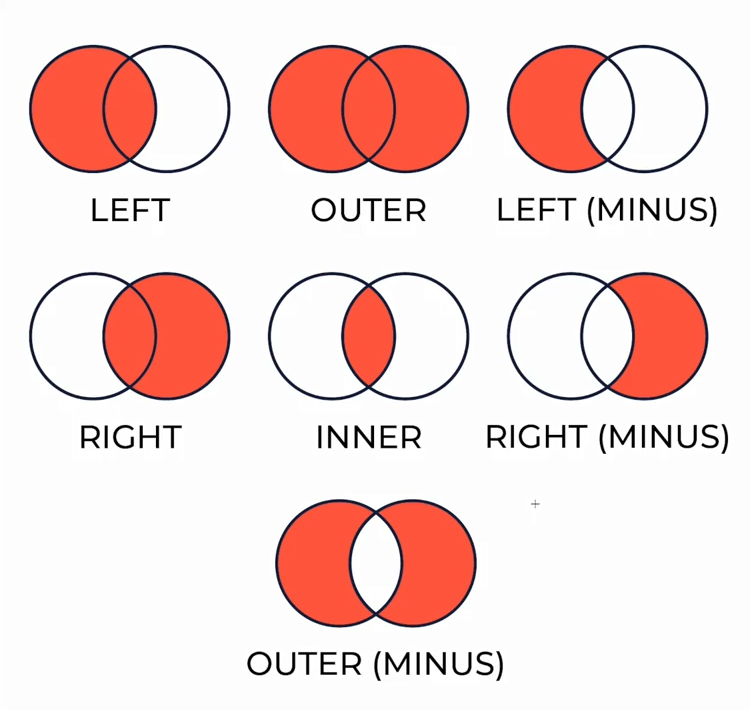

In [ ]:
cols = ["Name", "Salary"]

In [ ]:
company21 = pd.read_csv('company21.csv', usecols=cols, sep=';')
company21

,Name,Salary
0,Ethan,20000
1,Olivia,30000
2,Liam,40000
3,Emma,20000
4,Benjamin,10000
5,Ava,100000
6,Alexander,20000
7,James,40000
8,Isabella,40000
9,Mark,120000


In [52]:
company22 = pd.read_csv('company22.csv', usecols=cols, sep=';')
company22

,Name,Salary
0,Ethan,30000
1,Olivia,25000
2,Liam,40000
3,Robert,20000
4,Benjamin,10000
5,Maria,150000
6,Federico,150000
7,James,50000
8,Isabella,40000
9,Mark,120000


**.merge()**
- Merges a dataset with the dataset-style join

`Outer`

In [55]:
pd.merge(left=company21, right=company22,
         how='outer', on='Name', suffixes=['_21', '_22'],
         indicator=True)

,Name,Salary_21,Salary_22,_merge
0,Alexander,20000.0,NaN,left_only
1,Ava,100000.0,NaN,left_only
2,Benjamin,10000.0,10000.0,both
3,Emma,20000.0,NaN,left_only
4,Ethan,20000.0,30000.0,both
5,Federico,NaN,150000.0,right_only
6,Isabella,40000.0,40000.0,both
7,James,40000.0,50000.0,both
8,Liam,40000.0,40000.0,both
9,Maria,NaN,150000.0,right_only


In [61]:
pd.merge(left=company21, right=company22,
         how='outer', on='Salary', suffixes=['_21', '_22'],
         indicator=True)

,Name_21,Salary,Name_22,_merge
0,Benjamin,10000,Benjamin,both
1,Ethan,20000,Robert,both
2,Emma,20000,Robert,both
3,Alexander,20000,Robert,both
4,NaN,25000,Olivia,right_only
5,Olivia,30000,Ethan,both
6,Liam,40000,Liam,both
7,Liam,40000,Isabella,both
8,James,40000,Liam,both
9,James,40000,Isabella,both


`outer (minus)`

In [68]:
merged = pd.merge(left=company21, right=company22,
                  how='outer', on='Name', suffixes=['_21', '_22'],
                  indicator=True)
merged[merged['_merge'] != 'both']

,Name,Salary_21,Salary_22,_merge
0,Alexander,20000.0,NaN,left_only
1,Ava,100000.0,NaN,left_only
3,Emma,20000.0,NaN,left_only
5,Federico,NaN,150000.0,right_only
9,Maria,NaN,150000.0,right_only
12,Philipp,NaN,60000.0,right_only
13,Robert,NaN,20000.0,right_only


`inner`

In [60]:
pd.merge(left=company21, right=company22,
         how='inner', on='Name', suffixes=['_21', '_22'],
         indicator=True)

,Name,Salary_21,Salary_22,_merge
0,Ethan,20000,30000,both
1,Olivia,30000,25000,both
2,Liam,40000,40000,both
3,Benjamin,10000,10000,both
4,James,40000,50000,both
5,Isabella,40000,40000,both
6,Mark,120000,120000,both


`left`

In [64]:
pd.merge(left=company21, right=company22,
         how='left', on='Name', suffixes=['_21', '_22'],
         indicator=True)

,Name,Salary_21,Salary_22,_merge
0,Ethan,20000,30000.0,both
1,Olivia,30000,25000.0,both
2,Liam,40000,40000.0,both
3,Emma,20000,NaN,left_only
4,Benjamin,10000,10000.0,both
5,Ava,100000,NaN,left_only
6,Alexander,20000,NaN,left_only
7,James,40000,50000.0,both
8,Isabella,40000,40000.0,both
9,Mark,120000,120000.0,both


`left (minus)`

In [66]:
merged = pd.merge(left=company21, right=company22,
                  how='left', on='Name', suffixes=['_21', '_22'],
                  indicator=True)
merged[merged['_merge'] == 'left_only']

,Name,Salary_21,Salary_22,_merge
3,Emma,20000,NaN,left_only
5,Ava,100000,NaN,left_only
6,Alexander,20000,NaN,left_only


`right`

In [65]:
pd.merge(left=company21, right=company22,
         how='right', on='Name', suffixes=['_21', '_22'],
         indicator=True)

,Name,Salary_21,Salary_22,_merge
0,Ethan,20000.0,30000,both
1,Olivia,30000.0,25000,both
2,Liam,40000.0,40000,both
3,Robert,NaN,20000,right_only
4,Benjamin,10000.0,10000,both
5,Maria,NaN,150000,right_only
6,Federico,NaN,150000,right_only
7,James,40000.0,50000,both
8,Isabella,40000.0,40000,both
9,Mark,120000.0,120000,both


`right (minus)`

In [67]:
merged = pd.merge(left=company21, right=company22,
                  how='right', on='Name', suffixes=['_21', '_22'],
                  indicator=True)
merged[merged['_merge'] == 'right_only']

,Name,Salary_21,Salary_22,_merge
3,Robert,NaN,20000,right_only
5,Maria,NaN,150000,right_only
6,Federico,NaN,150000,right_only
10,Philipp,NaN,60000,right_only


### *Merging with different column names*

In [69]:
company21 = pd.read_csv('company21.csv', usecols=cols, sep=';')
company21

,Name,Salary
0,Ethan,20000
1,Olivia,30000
2,Liam,40000
3,Emma,20000
4,Benjamin,10000
5,Ava,100000
6,Alexander,20000
7,James,40000
8,Isabella,40000
9,Mark,120000


In [71]:

company22 = pd.read_csv('company21.csv', usecols=cols, sep=';')
company22.rename(columns={'Name':'Employee'}, inplace=True)
company22

,Employee,Salary
0,Ethan,20000
1,Olivia,30000
2,Liam,40000
3,Emma,20000
4,Benjamin,10000
5,Ava,100000
6,Alexander,20000
7,James,40000
8,Isabella,40000
9,Mark,120000


In [73]:
pd.merge(left=company21, 
         right=company22,
         how='inner', 
         left_on='Name', right_on='Employee', 
         suffixes=['_21', '_22'], indicator=True)

,Name,Salary_21,Employee,Salary_22,_merge
0,Ethan,20000,Ethan,20000,both
1,Olivia,30000,Olivia,30000,both
2,Liam,40000,Liam,40000,both
3,Emma,20000,Emma,20000,both
4,Benjamin,10000,Benjamin,10000,both
5,Ava,100000,Ava,100000,both
6,Alexander,20000,Alexander,20000,both
7,James,40000,James,40000,both
8,Isabella,40000,Isabella,40000,both
9,Mark,120000,Mark,120000,both


# `Time Series`

It's time we talk about **time** in Pandas!

In [6]:
time = pd.Timestamp('2011-08-12T20:17:46.384Z')
time.strftime('%Y-%m-%d %X')

'2011-08-12 20:17:46'

In [7]:
time.date()

datetime.date(2011, 8, 12)

In [8]:
time.day

12

### *Timestamp & DatetimeIndex*

**Timestamp** represents a single instant in time

In [9]:
pd.Timestamp('2021-12-01')

Timestamp('2021-12-01 00:00:00')

The constructor is quite flexible with the formats

In [11]:
pd.Timestamp('2021-12-01')
pd.Timestamp('2021.12.01')
pd.Timestamp('2021/12/01')
pd.Timestamp('2021 Dec 01')

Timestamp('2021-12-01 00:00:00')

Time elapsed since 1970 in nanoseconds

In [13]:
pd.Timestamp(1689930114960196000)

Timestamp('2023-07-21 09:01:54.960196')

You can also specify it to be a different unit

In [14]:
pd.Timestamp(1689930191.179011, unit='s')

Timestamp('2023-07-21 09:03:11.179011106')

In [15]:
pd.Timestamp(2025, 12, 5, 10, 10, 10)

Timestamp('2025-12-05 10:10:10')

In [16]:
pd.Timestamp(year=2025, month=12, day=5, hour=10, minute=10, second=10)

Timestamp('2025-12-05 10:10:10')

**to_datetime()** is similar to **Timestamp()** but more flexible

In [17]:
pd.to_datetime('2025.12.01')

Timestamp('2025-12-01 00:00:00')

In [18]:
pd.to_datetime(1689930114960196000)

Timestamp('2023-07-21 09:01:54.960196')

**DatetimeIndex** is a collection of **Timestamp** objects

In [21]:
pd.to_datetime(['2025.12.01','2025.12.02'])

DatetimeIndex(['2025-12-01', '2025-12-02'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['1997','2021.12.02', '20:20'], errors='coerce')

DatetimeIndex(['1997-01-01', 'NaT', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

### *date_range*

**date_range( )** is used to create a DatatimeIndex

In [32]:
pd.date_range(start='2021.01.01', end='2021.12.31')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [35]:
pd.date_range(start='2021.01.01', end='2021.12.31', freq='ME') # will make it monthly

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [38]:
pd.date_range(start='2021.01.01', end='2021.12.31', periods=12) # length = 12

DatetimeIndex([          '2021-01-01 00:00:00',
               '2021-02-03 02:10:54.545454545',
               '2021-03-08 04:21:49.090909091',
               '2021-04-10 06:32:43.636363636',
               '2021-05-13 08:43:38.181818182',
               '2021-06-15 10:54:32.727272728',
               '2021-07-18 13:05:27.272727272',
               '2021-08-20 15:16:21.818181820',
               '2021-09-22 17:27:16.363636364',
               '2021-10-25 19:38:10.909090908',
               '2021-11-27 21:49:05.454545456',
                         '2021-12-31 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [39]:
pd.date_range(start='2021.01.01', periods=12)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12'],
              dtype='datetime64[ns]', freq='D')

In [40]:
pd.date_range(end='2021.12.31', periods=12)

DatetimeIndex(['2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-27',
               '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='D')

### *Period & PeriodIndex*

**Periods** represent a general timeframe

In [41]:
pd.Period('2021-12-01')

Period('2021-12-01', 'D')

In [42]:
pd.period_range(start='2021-01-01', end='2021-01-31')

PeriodIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
             '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
             '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
             '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
             '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
             '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
             '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
             '2021-01-29', '2021-01-30', '2021-01-31'],
            dtype='period[D]')

In [45]:
pd.period_range(start='2021-01-01', end='2021-01-31', freq='M')

PeriodIndex(['2021-01'], dtype='period[M]')

**PeriodIndex** can be converted to **DatatimeIndex** using the following method

In [46]:
pd.period_range(start='2021-01-01', end='2021-01-31').to_timestamp()

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31'],
              dtype='datetime64[ns]', freq='D')

### *Timedelta & TimedeltaIndex*

In [ ]:
start_time = pd.Timestamp('2025.01.01 00:00')
end_time = pd.Timestamp('2025.01.01 00:02')

end_time - start_time

Timedelta('0 days 00:02:00')

In [3]:
pd.to_timedelta('1d 2h 20s')

Timedelta('1 days 02:00:20')

In [4]:
pd.to_timedelta('2 days')

Timedelta('2 days 00:00:00')

In [6]:
pd.to_timedelta('2 days 4 hours 30 minutes 20 seconds')

Timedelta('2 days 04:30:20')

In [7]:
pd.to_timedelta('1d 2h 30m 20s')

Timedelta('1 days 02:30:20')

In [8]:
pd.to_timedelta('1W 2D')

Timedelta('9 days 00:00:00')

In [9]:
pd.to_timedelta(['1d 2h 20s', '2 Days', '1 hours 30 seconds'])

TimedeltaIndex(['1 days 02:00:20', '2 days 00:00:00', '0 days 01:00:30'], dtype='timedelta64[ns]', freq=None)

In [10]:
pd.timedelta_range(start='1 day', periods=5)

TimedeltaIndex(['1 days', '2 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq='D')

In [14]:
pd.timedelta_range(start='1 day', periods=5, freq='2h')

TimedeltaIndex(['1 days 00:00:00', '1 days 02:00:00', '1 days 04:00:00',
                '1 days 06:00:00', '1 days 08:00:00'],
               dtype='timedelta64[ns]', freq='2h')

In [11]:
pd.timedelta_range(start='1 day', periods=3, closed='left')

TimedeltaIndex(['1 days', '2 days'], dtype='timedelta64[ns]', freq='D')

In [12]:
pd.timedelta_range(start='1 day', periods=3, closed='right')

TimedeltaIndex(['2 days', '3 days'], dtype='timedelta64[ns]', freq='D')

### *Accessing time attributes through .dt*

In [15]:
one_week = pd.date_range(start='2021.01.01', end='2021.01.07')
one_week

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07'],
              dtype='datetime64[ns]', freq='D')

In [16]:
one_week_df = pd.Series(one_week).to_frame(name='Dates')
one_week_df

,Dates
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
5,2021-01-06
6,2021-01-07


In [17]:
one_week_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   7 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 188.0 bytes


`.dt` allows us to access our datatime objects in Series or Dataframes

In [18]:
one_week_df['Dates'].dt.day

0    1
1    2
2    3
3    4
4    5
5    6
6    7
Name: Dates, dtype: int32

In [21]:
one_week_df['Dates'].dt.year

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
Name: Dates, dtype: int32

In [22]:
one_week_df['Dates'].dt.day_name()

0       Friday
1     Saturday
2       Sunday
3       Monday
4      Tuesday
5    Wednesday
6     Thursday
Name: Dates, dtype: object

In [23]:
one_week_df['Dates'].dt.month_name()

0    January
1    January
2    January
3    January
4    January
5    January
6    January
Name: Dates, dtype: object

In [24]:
one_week_df['Dates'].dt.to_period()

0    2021-01-01
1    2021-01-02
2    2021-01-03
3    2021-01-04
4    2021-01-05
5    2021-01-06
6    2021-01-07
Name: Dates, dtype: period[D]

In [25]:
one_week_df['Dates'].dt.days_in_month

0    31
1    31
2    31
3    31
4    31
5    31
6    31
Name: Dates, dtype: int32

### *Time Series in files*

Dataset: https://www.kaggle.com/datasets/suyashlakhani/apple-stock-prices-20152020

In [21]:
cols = ['date', 'high', 'low', 'open', 'close']
apple_stocks = pd.read_csv('AAPL.csv', usecols=cols, index_col='date')
apple_stocks

,close,high,low,open
date,,,,
2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34
2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86
2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23
2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20
2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86
...,...,...,...,...
2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17
2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03
2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68


In [32]:
apple_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2015-05-27 00:00:00+00:00 to 2020-05-22 00:00:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1258 non-null   float64
 1   high    1258 non-null   float64
 2   low     1258 non-null   float64
 3   open    1258 non-null   float64
dtypes: float64(4)
memory usage: 49.1+ KB


In [33]:
pd.to_datetime(apple_stocks.index)

DatetimeIndex(['2015-05-27 00:00:00+00:00', '2015-05-28 00:00:00+00:00',
               '2015-05-29 00:00:00+00:00', '2015-06-01 00:00:00+00:00',
               '2015-06-02 00:00:00+00:00', '2015-06-03 00:00:00+00:00',
               '2015-06-04 00:00:00+00:00', '2015-06-05 00:00:00+00:00',
               '2015-06-08 00:00:00+00:00', '2015-06-09 00:00:00+00:00',
               ...
               '2020-05-11 00:00:00+00:00', '2020-05-12 00:00:00+00:00',
               '2020-05-13 00:00:00+00:00', '2020-05-14 00:00:00+00:00',
               '2020-05-15 00:00:00+00:00', '2020-05-18 00:00:00+00:00',
               '2020-05-19 00:00:00+00:00', '2020-05-20 00:00:00+00:00',
               '2020-05-21 00:00:00+00:00', '2020-05-22 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=1258, freq=None)

In [38]:
apple_stocks = pd.read_csv('AAPL.csv', usecols=cols, 
                           parse_dates=['date'], 
                           index_col='date')
apple_stocks

,close,high,low,open
date,,,,
2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34
2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86
2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23
2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20
2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86
...,...,...,...,...
2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17
2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03
2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68


In [40]:
apple_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-05-27 00:00:00+00:00 to 2020-05-22 00:00:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1258 non-null   float64
 1   high    1258 non-null   float64
 2   low     1258 non-null   float64
 3   open    1258 non-null   float64
dtypes: float64(4)
memory usage: 49.1 KB


In [41]:
days = apple_stocks.index.day_name()
apple_stocks.insert(0, 'day', days)
apple_stocks

,day,close,high,low,open
date,,,,,
2015-05-27 00:00:00+00:00,Wednesday,132.045,132.260,130.0500,130.34
2015-05-28 00:00:00+00:00,Thursday,131.780,131.950,131.1000,131.86
2015-05-29 00:00:00+00:00,Friday,130.280,131.450,129.9000,131.23
2015-06-01 00:00:00+00:00,Monday,130.535,131.390,130.0500,131.20
2015-06-02 00:00:00+00:00,Tuesday,129.960,130.655,129.3200,129.86
...,...,...,...,...,...
2020-05-18 00:00:00+00:00,Monday,314.960,316.500,310.3241,313.17
2020-05-19 00:00:00+00:00,Tuesday,313.140,318.520,313.0100,315.03
2020-05-20 00:00:00+00:00,Wednesday,319.230,319.520,316.2000,316.68


If we read the csv without parsing the date, it will end up as a regular object

In [8]:
cols = ['date', 'high', 'low', 'open', 'close']
apple_stocks = pd.read_csv('AAPL.csv', usecols=cols)
apple_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   close   1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   open    1258 non-null   float64
dtypes: float64(4), object(1)
memory usage: 49.3+ KB


Let's create a new date format that isn't clean, so that we can try convert it to valid Timestamp.

In [10]:
date = pd.to_datetime(apple_stocks['date'])
new_format = date.dt.strftime('%d.%m.%Y__%H:%M__%p')
new_format

0       27.05.2015__00:00__AM
1       28.05.2015__00:00__AM
2       29.05.2015__00:00__AM
3       01.06.2015__00:00__AM
4       02.06.2015__00:00__AM
                ...          
1253    18.05.2020__00:00__AM
1254    19.05.2020__00:00__AM
1255    20.05.2020__00:00__AM
1256    21.05.2020__00:00__AM
1257    22.05.2020__00:00__AM
Name: date, Length: 1258, dtype: object

Replace the old index with the new format

In [11]:
apple_stocks.set_index(new_format, inplace=True)
apple_stocks.drop(columns='date', inplace=True)
apple_stocks

,close,high,low,open
date,,,,
27.05.2015__00:00__AM,132.045,132.260,130.0500,130.34
28.05.2015__00:00__AM,131.780,131.950,131.1000,131.86
29.05.2015__00:00__AM,130.280,131.450,129.9000,131.23
01.06.2015__00:00__AM,130.535,131.390,130.0500,131.20
02.06.2015__00:00__AM,129.960,130.655,129.3200,129.86
...,...,...,...,...
18.05.2020__00:00__AM,314.960,316.500,310.3241,313.17
19.05.2020__00:00__AM,313.140,318.520,313.0100,315.03
20.05.2020__00:00__AM,319.230,319.520,316.2000,316.68


Create a csv file contains our poorly formatted dates

In [12]:
apple_stocks.to_csv('bad_apple.csv')

Read our csv file and parse the dates

In [22]:
bad_apple = pd.read_csv('bad_apple.csv', parse_dates=['date'])
bad_apple

,date,close,high,low,open
0,27.05.2015__00:00__AM,132.045,132.260,130.0500,130.34
1,28.05.2015__00:00__AM,131.780,131.950,131.1000,131.86
2,29.05.2015__00:00__AM,130.280,131.450,129.9000,131.23
3,01.06.2015__00:00__AM,130.535,131.390,130.0500,131.20
4,02.06.2015__00:00__AM,129.960,130.655,129.3200,129.86
...,...,...,...,...,...
1253,18.05.2020__00:00__AM,314.960,316.500,310.3241,313.17
1254,19.05.2020__00:00__AM,313.140,318.520,313.0100,315.03
1255,20.05.2020__00:00__AM,319.230,319.520,316.2000,316.68
1256,21.05.2020__00:00__AM,316.850,320.890,315.8700,318.66


Try to convert it to a Timestamp

In [16]:
good_dates = pd.to_datetime(bad_apple['date'], format='%d.%m.%Y__%H:%M__%p')
good_dates

0      2015-05-27
1      2015-05-28
2      2015-05-29
3      2015-06-01
4      2015-06-02
          ...    
1253   2020-05-18
1254   2020-05-19
1255   2020-05-20
1256   2020-05-21
1257   2020-05-22
Name: date, Length: 1258, dtype: datetime64[ns]

Now we can replace the bad dates with the good ones again!

In [17]:
bad_apple.set_index(good_dates, inplace=True)
bad_apple.drop(columns='date', inplace=True)
bad_apple

,close,high,low,open
date,,,,
2015-05-27,132.045,132.260,130.0500,130.34
2015-05-28,131.780,131.950,131.1000,131.86
2015-05-29,130.280,131.450,129.9000,131.23
2015-06-01,130.535,131.390,130.0500,131.20
2015-06-02,129.960,130.655,129.3200,129.86
...,...,...,...,...
2020-05-18,314.960,316.500,310.3241,313.17
2020-05-19,313.140,318.520,313.0100,315.03
2020-05-20,319.230,319.520,316.2000,316.68


### *reindex*

In [23]:
cols = ['date', 'high', 'low', 'open', 'close']
apple_stocks = pd.read_csv('AAPL.csv', usecols=cols, index_col='date', parse_dates=['date'])
apple_stocks

,close,high,low,open
date,,,,
2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34
2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86
2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23
2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20
2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86
...,...,...,...,...
2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17
2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03
2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68


In [24]:
min_date = apple_stocks.index.min() # '2015-05-27 00:00:00+00:00'
max_date = apple_stocks.index.max() # '2020-05-22 00:00:00+00:00'

dates_incl_weekends = pd.date_range(start=min_date,
                                    end=max_date,
                                    freq='d')
dates_incl_weekends

DatetimeIndex(['2015-05-27 00:00:00+00:00', '2015-05-28 00:00:00+00:00',
               '2015-05-29 00:00:00+00:00', '2015-05-30 00:00:00+00:00',
               '2015-05-31 00:00:00+00:00', '2015-06-01 00:00:00+00:00',
               '2015-06-02 00:00:00+00:00', '2015-06-03 00:00:00+00:00',
               '2015-06-04 00:00:00+00:00', '2015-06-05 00:00:00+00:00',
               ...
               '2020-05-13 00:00:00+00:00', '2020-05-14 00:00:00+00:00',
               '2020-05-15 00:00:00+00:00', '2020-05-16 00:00:00+00:00',
               '2020-05-17 00:00:00+00:00', '2020-05-18 00:00:00+00:00',
               '2020-05-19 00:00:00+00:00', '2020-05-20 00:00:00+00:00',
               '2020-05-21 00:00:00+00:00', '2020-05-22 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1823, freq='D')

In [25]:
dates_incl_weekends.day_name().value_counts()

Wednesday    261
Thursday     261
Friday       261
Saturday     260
Sunday       260
Monday       260
Tuesday      260
Name: count, dtype: int64

In [26]:
apple_stocks.index[:6]

DatetimeIndex(['2015-05-27 00:00:00+00:00', '2015-05-28 00:00:00+00:00',
               '2015-05-29 00:00:00+00:00', '2015-06-01 00:00:00+00:00',
               '2015-06-02 00:00:00+00:00', '2015-06-03 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', freq=None)

Replace the old index with the new index

In [27]:
apple_stocks.reindex(dates_incl_weekends)

,close,high,low,open
2015-05-27 00:00:00+00:00,132.045,132.26,130.0500,130.34
2015-05-28 00:00:00+00:00,131.780,131.95,131.1000,131.86
2015-05-29 00:00:00+00:00,130.280,131.45,129.9000,131.23
2015-05-30 00:00:00+00:00,NaN,NaN,NaN,NaN
2015-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-05-18 00:00:00+00:00,314.960,316.50,310.3241,313.17
2020-05-19 00:00:00+00:00,313.140,318.52,313.0100,315.03
2020-05-20 00:00:00+00:00,319.230,319.52,316.2000,316.68
2020-05-21 00:00:00+00:00,316.850,320.89,315.8700,318.66


In [28]:
as2 = apple_stocks.reindex(dates_incl_weekends, method='ffill')
as2['day'] = as2.index.day_name()
as2.head(7)

,close,high,low,open,day
2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,Wednesday
2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,Thursday
2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,Friday
2015-05-30 00:00:00+00:00,130.280,131.450,129.90,131.23,Saturday
2015-05-31 00:00:00+00:00,130.280,131.450,129.90,131.23,Sunday
2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,Monday
2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,Tuesday


### *resample*

In [29]:
mounths = apple_stocks.resample('MS')
# mounths.groups
mounths

In [30]:
mounths.get_group('2016-01-01 00:00:00+0000')[:6]

,close,high,low,open
date,,,,
2016-01-04 00:00:00+00:00,105.35,105.368,102.00,102.61
2016-01-05 00:00:00+00:00,102.71,105.850,102.41,105.75
2016-01-06 00:00:00+00:00,100.70,102.370,99.87,100.56
2016-01-07 00:00:00+00:00,96.45,100.130,96.43,98.68
2016-01-08 00:00:00+00:00,96.96,99.110,96.76,98.55
2016-01-11 00:00:00+00:00,98.53,99.060,97.34,98.97


In [31]:
mounths.mean().round(2)

,close,high,low,open
date,,,,
2015-05-01 00:00:00+00:00,131.37,131.89,130.35,131.14
2015-06-01 00:00:00+00:00,127.81,128.76,127.24,128.06
2015-07-01 00:00:00+00:00,125.34,126.20,124.34,125.45
2015-08-01 00:00:00+00:00,113.39,115.50,111.29,113.44
2015-09-01 00:00:00+00:00,112.80,114.21,111.52,113.00
...,...,...,...,...
2020-01-01 00:00:00+00:00,311.92,314.33,308.83,311.17
2020-02-01 00:00:00+00:00,311.27,315.25,306.73,310.31
2020-03-01 00:00:00+00:00,262.44,269.69,254.85,261.07


Using `kind` to define what kind of datetime object we want to use

In [34]:
mounths = apple_stocks.resample('ME', kind='period')
[i for i in mounths.groups.items()][:6]

[(Period('2015-05', 'M'), np.int64(3)),
 (Period('2015-06', 'M'), np.int64(25)),
 (Period('2015-07', 'M'), np.int64(47)),
 (Period('2015-08', 'M'), np.int64(68)),
 (Period('2015-09', 'M'), np.int64(89)),
 (Period('2015-10', 'M'), np.int64(111))]

# `Matplotlib`

In [42]:
import matplotlib.pyplot as plt

In [43]:
cols = ['date', 'high', 'low', 'open', 'close']
apple_stocks = pd.read_csv('AAPL.csv', usecols=cols, index_col='date', parse_dates=['date'])
apple_stocks

,close,high,low,open
date,,,,
2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34
2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86
2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23
2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20
2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86
...,...,...,...,...
2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17
2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03
2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68


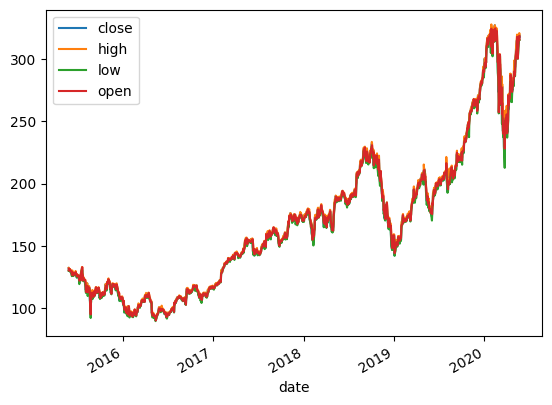

In [76]:
apple_stocks.plot();

### *Line plots*

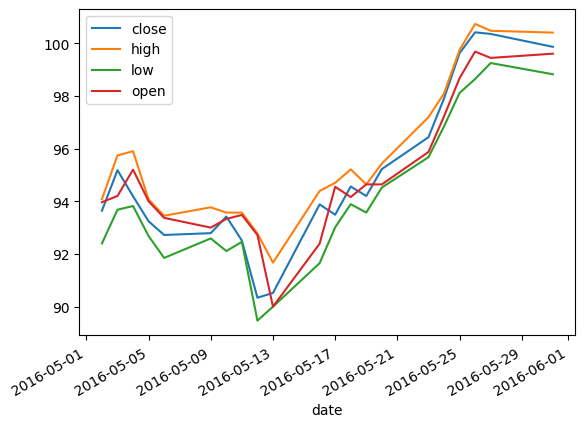

In [78]:
apple_stocks.loc['2016-05'].plot();

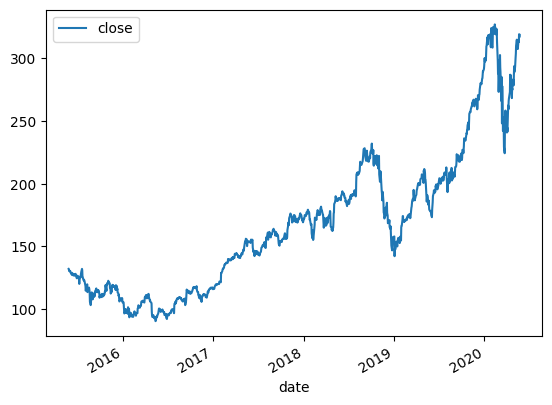

In [80]:
apple_stocks.plot(y='close');

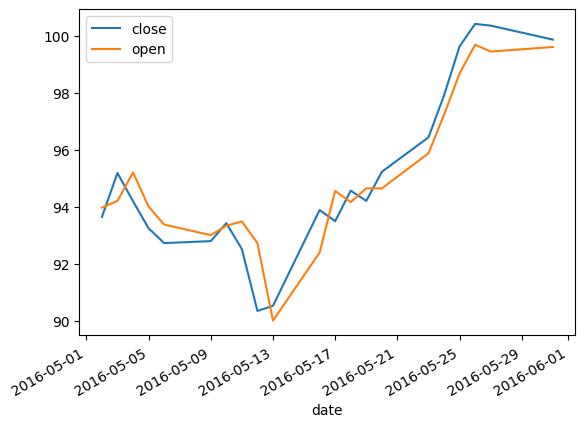

In [81]:
apple_stocks.loc['2016-05'].plot(y=['close', 'open']);

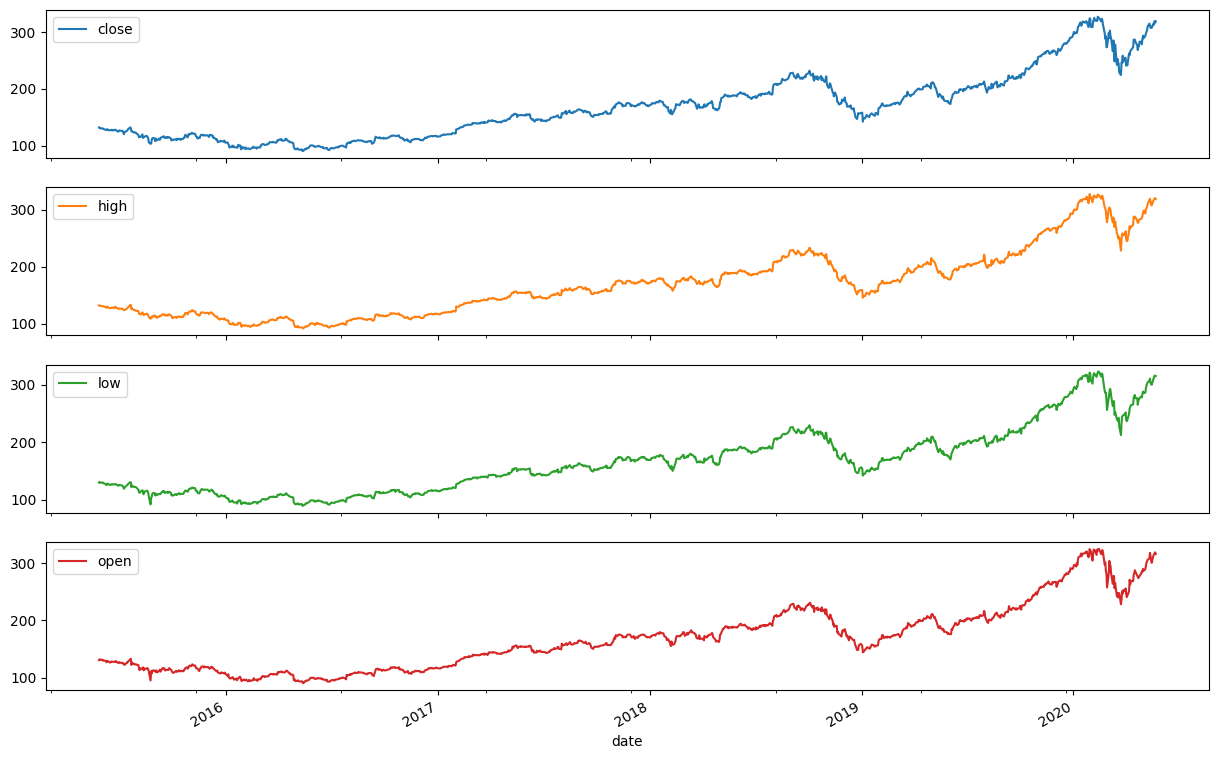

In [83]:
apple_stocks.plot(subplots=True, figsize=(15, 10));

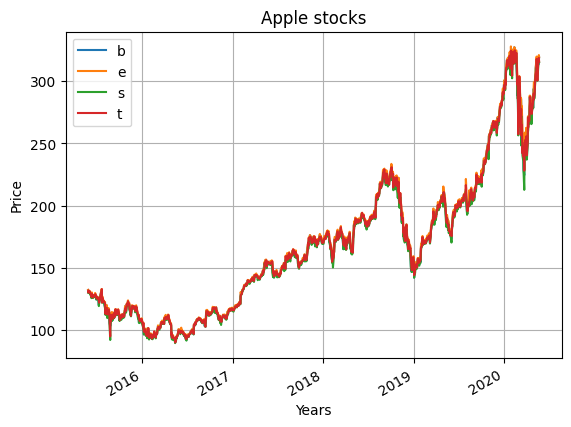

In [88]:
apple_stocks.plot()
plt.title('Apple stocks')
plt.legend('best')
plt.xlabel('Years')
plt.ylabel('Price')
plt.grid()

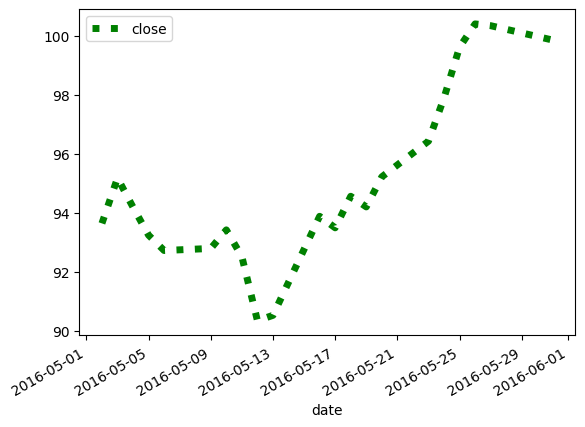

In [90]:
apple_stocks.loc['2016-05'].plot(y='close', c='g', linewidth=5, linestyle=':');

### *Bar plots*

In [46]:
years = apple_stocks.resample('YE').mean().round(2)
years.index = years.index.year
years

,close,high,low,open
date,,,,
2015,117.83,119.03,116.65,117.93
2016,104.60,105.43,103.69,104.51
2017,150.55,151.41,149.49,150.45
2018,189.05,190.99,187.18,189.11
2019,208.26,209.83,206.27,207.87
2020,291.79,295.89,287.02,290.75


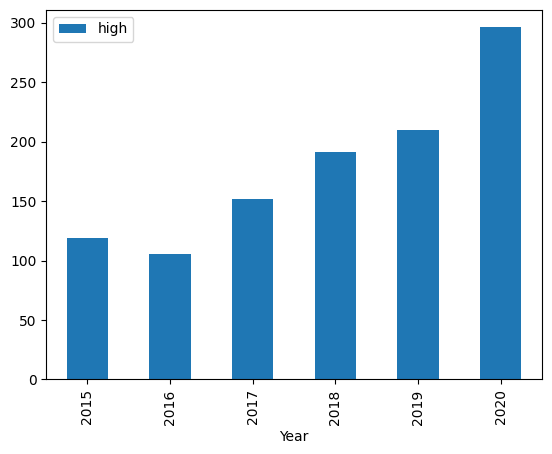

In [50]:
years.plot(y='high', kind='bar')
plt.xlabel('Year');

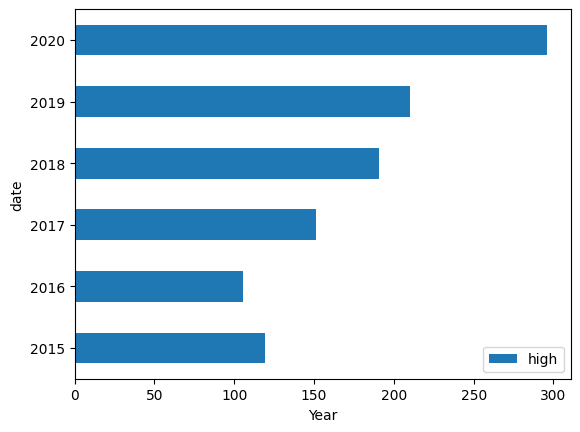

In [51]:
years.plot(y='high', kind='barh')
plt.xlabel('Year');

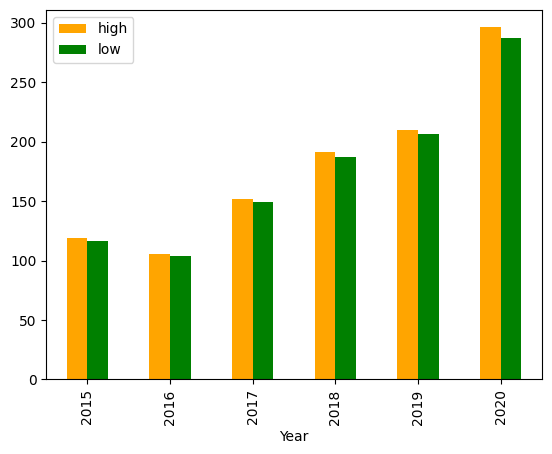

In [52]:
years.plot(y=['high', 'low'], kind='bar', color=['orange', 'green'])
plt.xlabel('Year');

### *Histograms*

In [53]:
exams = pd.read_csv('exams.csv')
exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


Create a new column called `total`

In [54]:
exams['total'] = exams['math score'] + exams['reading score'] + exams['writing score']
exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,208
996,male,group D,associate's degree,free/reduced,completed,85,91,92,268
997,female,group C,some high school,free/reduced,none,32,35,41,108
998,female,group C,some college,standard,none,73,74,82,229


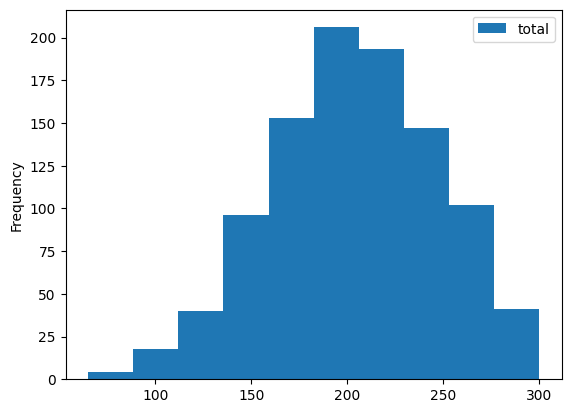

In [56]:
exams.plot(y='total', kind='hist');

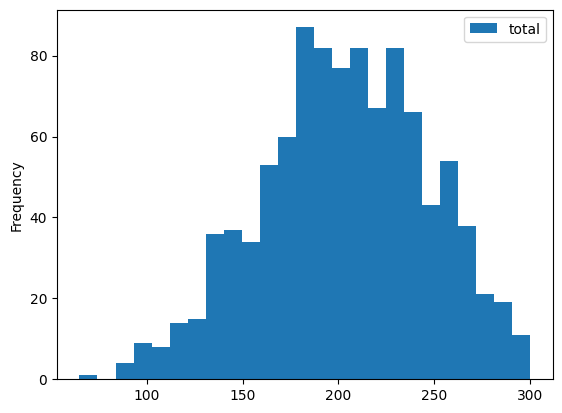

In [59]:
exams.plot(y='total', kind='hist', bins=25);

Can also be used directly on columns in Pandas

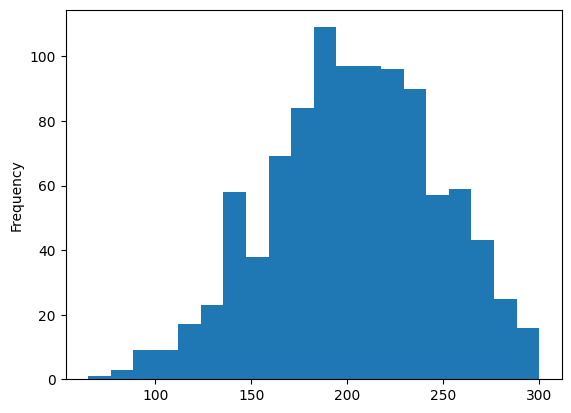

In [61]:
exams['total'].plot(kind='hist', bins=20);

### *Pie charts*

In [64]:
richest = pd.read_csv('TopRichestInWorld.csv')
industries = richest['Industry'].value_counts()
industries

Industry
Fashion & Retail         18
Technology               15
Finance & Investments    13
Metals & Mining           9
Food & Beverage           8
Automotive                7
Diversified               6
Manufacturing             5
Healthcare                5
Media & Entertainment     4
Real Estate               3
Telecom                   2
Logistics                 2
Energy                    2
Gambling & Casinos        1
Service                   1
Name: count, dtype: int64

Creating our first pie chart

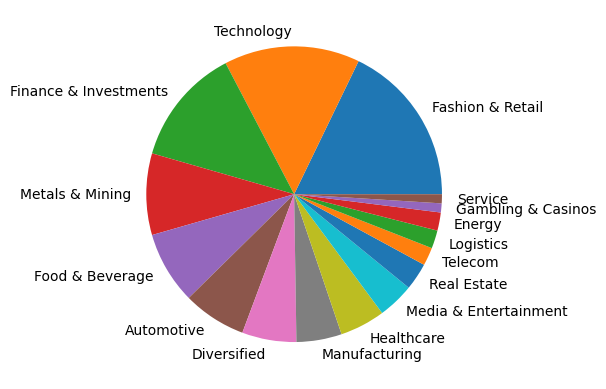

In [66]:
plt.pie(x=industries.values, labels=industries.index);

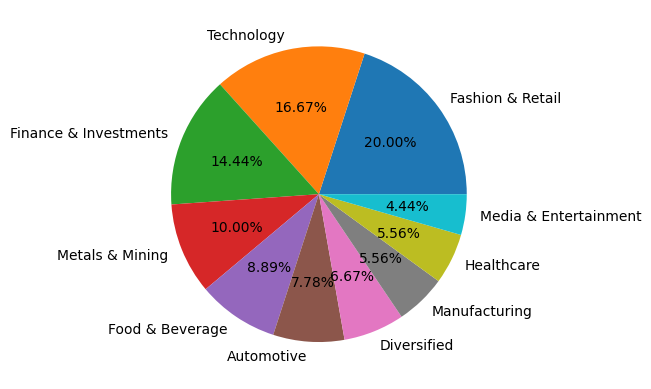

In [68]:
plt.pie(x=industries.values[:10], 
        labels=industries.index[:10],
        autopct='%.2f%%');

### *Scatter*

In [69]:
pokemons = pd.read_csv('Pokemon.csv', index_col='#')
pokemons

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


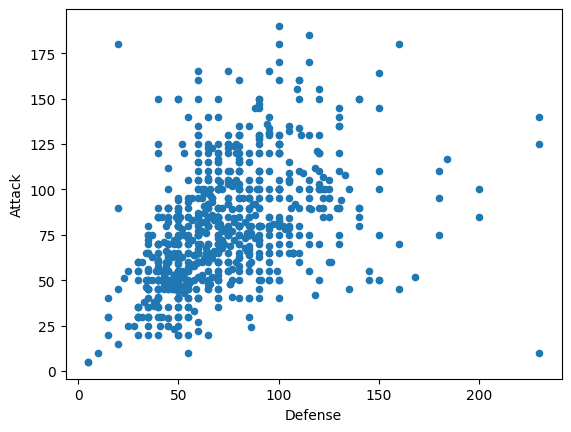

In [73]:
pokemons.plot(x='Defense', y='Attack', kind='scatter');

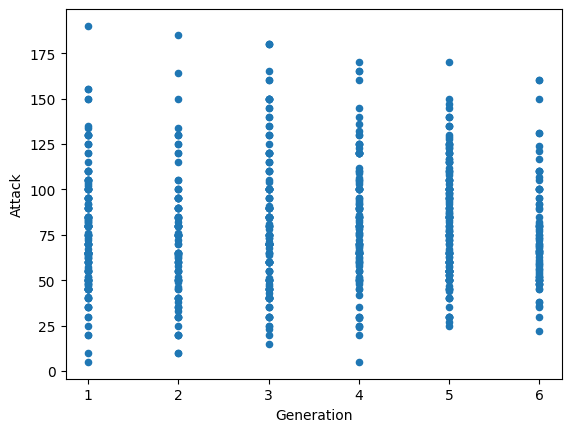

In [74]:
pokemons.plot(x='Generation', y='Attack', kind='scatter');

### *Candlestick charts (Bonus)*

In [ ]:
# pip install mplfinance
import mplfinance as mpf

In [77]:
cols = ['date', 'high', 'low', 'open', 'close']
apple_stocks = pd.read_csv('AAPL.csv', usecols=cols, index_col='date', parse_dates=['date'])

year_2016 = apple_stocks.loc['2016-01':'2016-3']
year_2016

,close,high,low,open
date,,,,
2016-01-04 00:00:00+00:00,105.35,105.368,102.00,102.61
2016-01-05 00:00:00+00:00,102.71,105.850,102.41,105.75
2016-01-06 00:00:00+00:00,100.70,102.370,99.87,100.56
2016-01-07 00:00:00+00:00,96.45,100.130,96.43,98.68
2016-01-08 00:00:00+00:00,96.96,99.110,96.76,98.55
...,...,...,...,...
2016-03-24 00:00:00+00:00,105.67,106.250,104.89,105.47
2016-03-28 00:00:00+00:00,105.19,106.190,105.06,106.00
2016-03-29 00:00:00+00:00,107.68,107.790,104.88,104.89


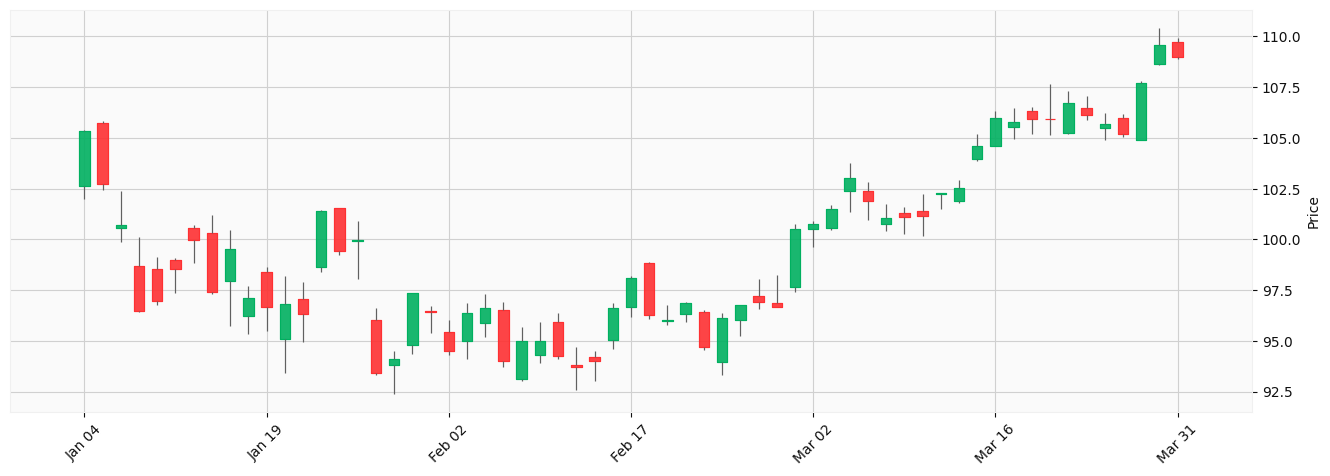

In [83]:
mpf.plot(year_2016, type='candle',
         style='yahoo',
         figratio=(3, 1))

### *Color by value*

Source: https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

In [84]:
from matplotlib.patches import Patch

In [88]:
air_quality = pd.read_csv('gap.csv', usecols=['Country', 'City', 'AQI Value', 'AQI Category'])
air_quality.sort_values(by='AQI Value', inplace=True)
air_quality

,Country,City,AQI Value,AQI Category
512,Bolivia (Plurinational State of),El Torno,6,Good
9194,Ecuador,Macas,7,Good
14502,Ecuador,Azogues,8,Good
23269,Papua New Guinea,Tari,8,Good
7486,Peru,Huaraz,9,Good
...,...,...,...,...
15536,India,Gulaothi,500,Hazardous
14064,India,Suratgarh,500,Hazardous
1865,India,Pilkhuwa,500,Hazardous
6657,India,Churu,500,Hazardous


In [95]:
countries = air_quality.groupby('Country')

average = countries.mean(numeric_only=True).round(2)
average.sort_values(by='AQI Value', inplace=True)
average

,AQI Value
Country,
Palau,16.00
Solomon Islands,18.00
Maldives,19.00
Iceland,23.00
Bolivia (Plurinational State of),23.79
...,...
United Arab Emirates,163.67
Pakistan,178.79
Mauritania,179.00


In [96]:
def color(number: int) -> str:
    if number < 50 :
        return 'forestgreen'
    elif number < 100 :
        return 'orange'
    else:
        return 'crimson'

In [98]:
colors = average['AQI Value'].apply(color)
colors

Country
Palau                               forestgreen
Solomon Islands                     forestgreen
Maldives                            forestgreen
Iceland                             forestgreen
Bolivia (Plurinational State of)    forestgreen
                                       ...     
United Arab Emirates                    crimson
Pakistan                                crimson
Mauritania                              crimson
Bahrain                                 crimson
Republic of Korea                       crimson
Name: AQI Value, Length: 175, dtype: object

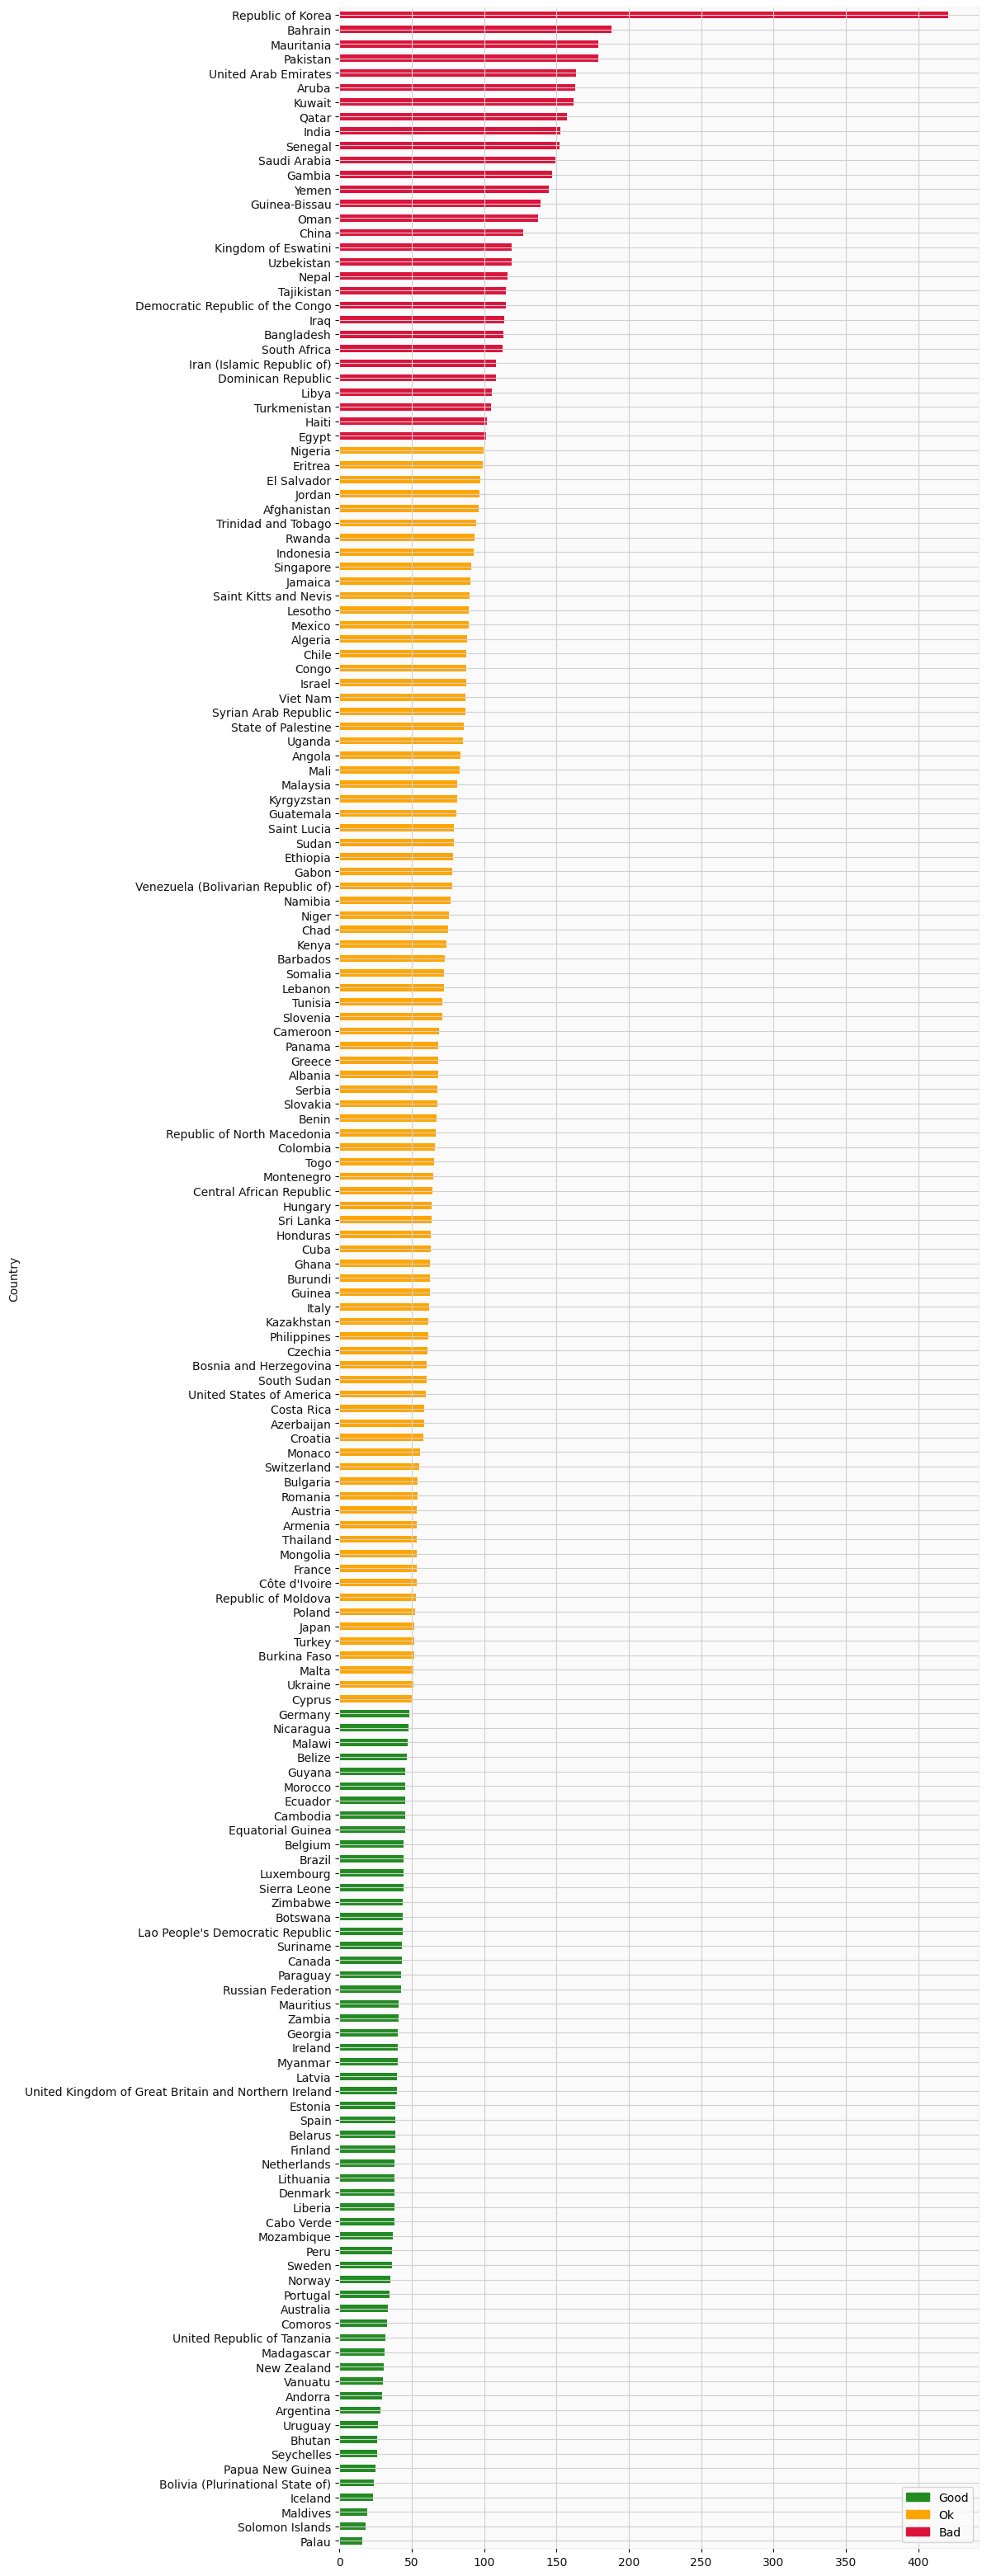

In [103]:
good = Patch(color='forestgreen', label='Good')
ok = Patch(color='orange', label='Ok')
bad = Patch(color='crimson', label='Bad')

average.plot(y='AQI Value',
             kind='barh',
             figsize=(10, 40),
             color=colors.values)

plt.legend(handles=[good, ok, bad]);